# What to do

1. Data Preprocessing: Prepare your dataset for training by performing necessary preprocessing steps, such as data cleaning, normalization, and handling missing values. Ensure that the data is in a suitable format for your chosen machine learning algorithm.

2. Splitting the Dataset: Divide your dataset into two parts: a training set and a testing/validation set. The training set will be used to train the model, while the testing/validation set will be used to evaluate its performance. A common split ratio is 70-30 or 80-20 for training and testing, respectively.

3. Feature Engineering: Extract relevant features from your data that can help discriminate between the two classes. This step may involve domain-specific knowledge and can greatly impact the model's performance. Consider both the input features and any additional derived features that may be useful.

4. Model Selection: Choose an appropriate machine learning model for your task. The choice of model depends on various factors, such as the nature of your data, the size of the dataset, and the complexity of the problem. Common models for classification tasks include logistic regression, decision trees, random forests, support vector machines (SVMs), and deep learning models such as convolutional neural networks (CNNs) or recurrent neural networks (RNNs).

5. Model Training: Train your chosen model using the training dataset. During training, the model learns to make predictions based on the input features and the corresponding class labels. The specific training process depends on the selected model and can involve techniques like gradient descent, backpropagation, or optimization algorithms.

6. Model Evaluation: Assess the performance of your trained model using the testing/validation dataset. Common evaluation metrics for classification tasks include accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (ROC AUC). Evaluate the model's performance to understand its strengths and weaknesses.

7. Hyperparameter Tuning: Optimize the model's hyperparameters to improve its performance. Hyperparameters are configuration settings that determine how the model learns and generalizes from the training data. Techniques like grid search, random search, or Bayesian optimization can be used to find the optimal hyperparameters.

8. Iterative Refinement: Based on the evaluation results, make necessary adjustments to your model or feature engineering techniques to enhance its performance. This iterative process may involve trying different models, exploring different feature sets, or collecting more data to improve the overall detection capabilities.

9. Final Model Deployment: Once you are satisfied with the performance of your model, you can deploy it for automated detection. This could involve integrating the model into an application, setting up an API, or making it available for predictions on new, unseen data.

In [4]:
#importing the necessary libraries
#import csv

import pandas as pd
import numpy as np

# Preprocessing

## Creating different DataFrames for different tasks

In [5]:
#reading in the dataset
df_og = pd.read_csv('/kaggle/input/completed-annotation/all_annotated.csv')
#removing all the NA values by replacing them with whitspaces
#df_og.fillna(" ", inplace = True)

df_og.head()


#df_og is the original data frame that contains all the information
#df_co is the new data frame which only contains the compounds
#df_news is the data frame which contains the compound, the newspaper, & the year

,Compound,Title,Year,Source,Annotation
0,Flüchtlings-Konzept,Flüchtlings-Konzept gibt es schon seit April,2014,BILD,0
1,Wachleute,Insider berichtet in BILD über Asylheim-Skanda...,2014,BILD,0
2,Wachleute,In Flüchtlingsheim in NRW : Wachleute sollen A...,2014,BILD,0
3,Wachleute,Wachleute misshandeln Flüchtlinge : Sie quälen...,2014,BILD,0
4,Wachleute,Folter-Skandal in deutschen Asylbewerberheimen...,2014,BILD,0


In [6]:
#creating sub-dataframe for either enigmatic or descriptive compounds
#for easier data manipulation

# Split the DataFrame based on 'Annotation' value
df_en = df_og[df_og['Annotation'] == 1]
df_de = df_og[df_og['Annotation'] == 0]

print("DataFrame with Annotation == 1:")
print(df_en.head())

print("\nDataFrame with Annotation == 0:")
print(df_de.head())


DataFrame with Annotation == 1:
              Compound                                              Title  \
1006  Asylheim-Skandal  Insider berichtet in BILD über Asylheim-Skanda...   
1007      Polit-Prügel  Trotz Polit-Prügel Kudla verteidigt „Nein“ zu ...   
1008  Flüchtlingsstrom  Bremen sucht nach Wegen um mit dem zunehmenden...   
1009  Flüchtlingsinsel  100 000 strandeten dieses Jahr auf Lampedusa: ...   
1010       Ebola-Angst  100 000 strandeten dieses Jahr auf Lampedusa: ...   

      Year Source  Annotation  
1006  2014   BILD           1  
1007  2014   BILD           1  
1008  2014   BILD           1  
1009  2014   BILD           1  
1010  2014   BILD           1  

DataFrame with Annotation == 0:
              Compound                                              Title  \
0  Flüchtlings-Konzept       Flüchtlings-Konzept gibt es schon seit April   
1            Wachleute  Insider berichtet in BILD über Asylheim-Skanda...   
2            Wachleute  In Flüchtlingsheim in NRW

## Modifying the compounds (removing hyphens, making them lowercase, lemmatizing them)

### Modified original DataFrame

In [7]:
#cleaning the text, i.e., making it lowercase, removing hyphens from the compounds, etc.
import re

# Make a copy of the original DataFrame
df_mod = df_og.copy()

# Function to modify compounds with hyphens
def modify_compound(row):
    word = row['Compound']
    if '-' in word:
        # If hyphen is present, convert all to lowercase and capitalize the first letter
        modified_word = re.sub(r'(\w+)-(\w+)', lambda match: match.group(1).capitalize() + match.group(2).lower(), word)
    else:
        # If no hyphen, turn uppercase into lowercase, but with the first letter capitalized
        modified_word = word.lower().capitalize()
    return modified_word

# Apply the modification to the 'Compound' column
df_mod['Compound'] = df_mod.apply(modify_compound, axis=1)

print(df_mod)

                 Compound                                              Title  \
0      Flüchtlingskonzept       Flüchtlings-Konzept gibt es schon seit April   
1               Wachleute  Insider berichtet in BILD über Asylheim-Skanda...   
2               Wachleute  In Flüchtlingsheim in NRW : Wachleute sollen A...   
3               Wachleute  Wachleute misshandeln Flüchtlinge : Sie quälen...   
4               Wachleute  Folter-Skandal in deutschen Asylbewerberheimen...   
...                   ...                                                ...   
20072   Flüchtlingskinder      Neue Hoffnung für Flüchtlingskinder von Nauru   
20073  Blitzabschiebungen                   Streit über "Blitzabschiebungen"   
20074   Flüchtlingskinder           Flüchtlingskinder ungenügend unterstützt   
20075         Bamfskandal  Polizei prüft Bamf-Skandal Ermittlergruppe sol...   
20076    Migrantenschreck  Mario Rönsch soll den Waffenshop „Migrantensch...   

       Year Source  Annotation  
0     

In [23]:
#looking for a specific word in the dataframe
value_to_find = 'FLÜCHTLINGSKRISE'

# Create a boolean mask to filter the DataFrame
mask = df_mod['Compound'] == value_to_find

# Use the mask to filter the DataFrame and get the rows with the target value
result = df_mod[mask]

# Print the resulting DataFrame
print(result)

Empty DataFrame
Columns: [Compound, Title, Year, Source, Annotation]
Index: []


In [ ]:
#lemmatizing/ stemming the words to ensure that the several versions of the 
#same word are counted as one word, e.g., Flüchtlingskind and Flüchtlingskinder
#will both result in Flüchtlingskind

In [8]:
#downloading the large German model
!python -m spacy download de_core_news_lg

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [11]:
import spacy

In [13]:
#loading the model
nlp = spacy.load('de_core_news_lg')

In [14]:
#lemmatizing each word to obtain the underlying form (i.e., remove plural ending, etc.)
df_mod['Compound'] = df_mod['Compound'].apply(lambda x: [token.lemma_ for token in nlp(x)][0])
print(df_mod.head())

             Compound                                              Title  \
0  Flüchtlingskonzept       Flüchtlings-Konzept gibt es schon seit April   
1           wachleute  Insider berichtet in BILD über Asylheim-Skanda...   
2           wachleute  In Flüchtlingsheim in NRW : Wachleute sollen A...   
3           wachleute  Wachleute misshandeln Flüchtlinge : Sie quälen...   
4           wachleute  Folter-Skandal in deutschen Asylbewerberheimen...   

   Year Source  Annotation  
0  2014   BILD           0  
1  2014   BILD           0  
2  2014   BILD           0  
3  2014   BILD           0  
4  2014   BILD           0  


### modified Enigmatic DataFrame

In [15]:
# Make a copy of the original DataFrame
df_mod_en = df_en.copy()

# Function to modify compounds with hyphens
def modify_compound(row):
    word = row['Compound']
    if '-' in word:
        # If hyphen is present, convert all to lowercase and capitalize the first letter
        modified_word = re.sub(r'(\w+)-(\w+)', lambda match: match.group(1).capitalize() + match.group(2).lower(), word)
    else:
        # If no hyphen, turn uppercase into lowercase, but with the first letter capitalized
        modified_word = word.lower().capitalize()
    return modified_word

# Apply the modification to the 'Compound' column
df_mod_en['Compound'] = df_mod_en.apply(modify_compound, axis=1)

print(df_mod_en)

                 Compound                                              Title  \
1006      Asylheimskandal  Insider berichtet in BILD über Asylheim-Skanda...   
1007          Politprügel  Trotz Polit-Prügel Kudla verteidigt „Nein“ zu ...   
1008     Flüchtlingsstrom  Bremen sucht nach Wegen um mit dem zunehmenden...   
1009     Flüchtlingsinsel  100 000 strandeten dieses Jahr auf Lampedusa: ...   
1010           Ebolaangst  100 000 strandeten dieses Jahr auf Lampedusa: ...   
...                   ...                                                ...   
20072   Flüchtlingskinder      Neue Hoffnung für Flüchtlingskinder von Nauru   
20073  Blitzabschiebungen                   Streit über "Blitzabschiebungen"   
20074   Flüchtlingskinder           Flüchtlingskinder ungenügend unterstützt   
20075         Bamfskandal  Polizei prüft Bamf-Skandal Ermittlergruppe sol...   
20076    Migrantenschreck  Mario Rönsch soll den Waffenshop „Migrantensch...   

       Year Source  Annotation  
1006  

In [16]:
#lemmatizing each word to obtain the underlying form (i.e., remove plural ending, etc.)
df_mod_en['Compound'] = df_mod_en['Compound'].apply(lambda x: [token.lemma_ for token in nlp(x)][0])
print(df_mod_en)  

                Compound                                              Title  \
1006     Asylheimskandal  Insider berichtet in BILD über Asylheim-Skanda...   
1007         Politprügel  Trotz Polit-Prügel Kudla verteidigt „Nein“ zu ...   
1008    Flüchtlingsstrom  Bremen sucht nach Wegen um mit dem zunehmenden...   
1009    Flüchtlingsinsel  100 000 strandeten dieses Jahr auf Lampedusa: ...   
1010          Ebolaangst  100 000 strandeten dieses Jahr auf Lampedusa: ...   
...                  ...                                                ...   
20072    Flüchtlingskind      Neue Hoffnung für Flüchtlingskinder von Nauru   
20073  Blitzabschiebunge                   Streit über "Blitzabschiebungen"   
20074    Flüchtlingskind           Flüchtlingskinder ungenügend unterstützt   
20075        Bamfskandal  Polizei prüft Bamf-Skandal Ermittlergruppe sol...   
20076   Migrantenschreck  Mario Rönsch soll den Waffenshop „Migrantensch...   

       Year Source  Annotation  
1006   2014   BILD

In [14]:
#writing the info from the data frame into a new file
import csv
#path of new file
csv_file = 'df_mod_en.csv'

with open(csv_file, 'w', newline='', encoding='utf-8') as csv_file:
    #writer = csv.writer(csv_file)
    #for item in df:Noun,Title,Year,Source,Annotation 0/1
    #    writer.writerow([item])
    df_mod_en.to_csv(csv_file, index=False)

### Modified descriptive DataFrame

In [17]:
# Make a copy of the original DataFrame
df_mod_de = df_de.copy()

# Function to modify compounds with hyphens
def modify_compound(row):
    word = row['Compound']
    if '-' in word:
        # If hyphen is present, convert all to lowercase and capitalize the first letter
        modified_word = re.sub(r'(\w+)-(\w+)', lambda match: match.group(1).capitalize() + match.group(2).lower(), word)
    else:
        # If no hyphen, turn uppercase into lowercase, but with the first letter capitalized
        modified_word = word.lower().capitalize()
    return modified_word

# Apply the modification to the 'Compound' column
df_mod_de['Compound'] = df_mod_de.apply(modify_compound, axis=1)

print(df_mod_de)

                 Compound                                              Title  \
0      Flüchtlingskonzept       Flüchtlings-Konzept gibt es schon seit April   
1               Wachleute  Insider berichtet in BILD über Asylheim-Skanda...   
2               Wachleute  In Flüchtlingsheim in NRW : Wachleute sollen A...   
3               Wachleute  Wachleute misshandeln Flüchtlinge : Sie quälen...   
4               Wachleute  Folter-Skandal in deutschen Asylbewerberheimen...   
...                   ...                                                ...   
19997        Massenflucht                             Massenflucht in Syrien   
19998          Umlaufbahn  In der europäischen Umlaufbahn Flüchtlinge sol...   
19999        Dublinsystem  In der europäischen Umlaufbahn Flüchtlinge sol...   
20000         Finanzhilfe                            Trump kürzt Finanzhilfe   
20001    Gewaltverbrechen               19-Jähriger gesteht Gewaltverbrechen   

       Year Source  Annotation  
0     

In [18]:
#lemmatizing each word to obtain the underlying form (i.e., remove plural ending, etc.)
df_mod_de['Compound'] = df_mod_de['Compound'].apply(lambda x: [token.lemma_ for token in nlp(x)][0])
print(df_mod_de)

                 Compound                                              Title  \
0      Flüchtlingskonzept       Flüchtlings-Konzept gibt es schon seit April   
1               wachleute  Insider berichtet in BILD über Asylheim-Skanda...   
2               wachleute  In Flüchtlingsheim in NRW : Wachleute sollen A...   
3               wachleute  Wachleute misshandeln Flüchtlinge : Sie quälen...   
4               wachleute  Folter-Skandal in deutschen Asylbewerberheimen...   
...                   ...                                                ...   
19997        Massenflucht                             Massenflucht in Syrien   
19998          Umlaufbahn  In der europäischen Umlaufbahn Flüchtlinge sol...   
19999        Dublinsystem  In der europäischen Umlaufbahn Flüchtlinge sol...   
20000         Finanzhilfe                            Trump kürzt Finanzhilfe   
20001    Gewaltverbrechen               19-Jähriger gesteht Gewaltverbrechen   

       Year Source  Annotation  
0     

In [17]:
#writing the info from the data frame into a new file
import csv
#path of new file
csv_file = 'df_mod_de.csv'

df_mod_de.to_csv(csv_file, index=False)

## Tokenizing the compounds (and the text?)

In [ ]:
#tokenizing the compounds and titles for the EDA and the 
#language model

text = df_new['text']
#transforming the ratings from the column 'fraudulent' into a numpy array
labels = df_new['fraudulent'].values

#tokenizing
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
#creating the mapping between words and integers
#to convert new text into a sequence of integers -> model input
tokenizer.fit_on_texts(text)
#sequences = tokenizer.texts_to_sequences(text) 


In [2]:
#using only the information from the compound column
df_comp = df_og['Compound']

df_comp.head()

0    Flüchtlings-Konzept
1              Wachleute
2              Wachleute
3              Wachleute
4              Wachleute
Name: Compound, dtype: object

In [5]:
#creating a data frame which contains the infos for 
#the compounds, newspaper, and year
df_news = df_og[['Compound'] + ['Year'] + ['Source']]

df_news.head()

,Compound,Year,Source
0,Flüchtlings-Konzept,2014,BILD
1,Wachleute,2014,BILD
2,Wachleute,2014,BILD
3,Wachleute,2014,BILD
4,Wachleute,2014,BILD


# One Shot Learning (in the collapsed chunks)

In [7]:
#data frame for the one shot learning
df_one = pd.read_csv('/kaggle/input/oneshot/one-shot.csv')
#removing all the NA values by replacing them with whitspaces
#df_one.fillna(" ", inplace = True)

df_one.head()

,target,context,labels
0,Asylstreit,Grüne fordern Kompromiss in Asylstreit,0
1,Flüchtlingskonto,Schäuble und de Maizière uneins über Flüchtlin...,0
2,Flüchtlingsandrang,Kommunen rechnen mit weiterem Flüchtlingsandra...,1
3,Flüchtlingschaos,Gerhart-Hauptmann-Schule: Polizei warnt vor ne...,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load the data

# Step 2: Text Cleaning
# You can customize this function based on your specific cleaning needs
def clean_text(text):
    # Example: Convert to lowercase and remove special characters and punctuation
    text = text.lower()
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return text

# Apply the text cleaning function to the 'context' column
df_one['context'] = df_one['context'].apply(clean_text)

# Step 3: Tokenization
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_one['context'])

# Convert the text data to sequences of integers
sequences = tokenizer.texts_to_sequences(df_one['context'])

# Step 4: Label Encoding -> i don't think this is necessary bc the labels are already binary
#label_encoder = LabelEncoder()
#df_one['labels'] = label_encoder.fit_transform(df_one['labels'])

# Step 5: Train-Test Split
X = sequences
y = df_one['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Extraction
# Pad the sequences to a fixed length (required for language models)
max_sequence_length = 100  # Set your desired sequence length here
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

# Now you have X_train, X_test, y_train, and y_test ready to train and evaluate your language model.

# ... Train your language model using X_train and y_train ...

# ... Evaluate your language model using X_test and y_test ...


In [34]:
#defining and training the one-shot model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM

#using the first 200 words from the data set
vocab_size = 200

#setting the random seed so that the weights stay the same
#np.random.seed(113)

#defining the model
#setting the output dimensions to 20
out_dim=200
#using a sequential model
model_oneshot = Sequential(name = "model1shot")
#using an embedding, LSTM, and dense layer
model_oneshot.add(Embedding(vocab_size,out_dim,input_length=max_sequence_length))
model_oneshot.add(Bidirectional(LSTM(40 )))
model_oneshot.add(Dense(1,activation='sigmoid'))
#compiling the model, i.e., setting the parameters
model_oneshot.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model_oneshot.summary())

Model: "model1shot"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 200)          40000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 80)               77120     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 1)                 81        
                                                                 
Total params: 117,201
Trainable params: 117,201
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
#fitting the one-shot model
history_one = model_oneshot.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64)
                    #validation_data=(X_val, y_val))

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 0.6933 - accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 67ms/step - loss: 0.6752 - accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 67ms/step - loss: 0.6582 - accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 65ms/step - loss: 0.6417 - accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 0s 69ms/step - loss: 0.6255 - accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 0s 65ms/step - loss: 0.6093 - accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 65ms/step - loss: 0.5931 - accuracy: 0.6667
Epoch 8/20
1/1 [==============================] - 0s 68ms/step - loss: 0.5771 - accuracy: 0.6667
Epoch 9/20
1/1 [==============================] - 0s 66ms/step - loss: 0.5613 - accuracy: 0.6667
Epoch 10/20
1/1 [==============================] - 0s 69ms/step - loss: 0.5460 - accuracy: 0.6667
Epoch 11/20
1/1 [==============

In [155]:
from sklearn.metrics import confusion_matrix, classification_report

#predicting on the test data
y_pred = model_oneshot.predict(X_test)
y_pred = np.around(y_pred, decimals=0)

print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('classification report:',classification_report(y_test,y_pred))

1/1 [==============================] - 0s 33ms/step
confusion matrix: [[0 1]
 [0 0]]
classification report:               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       1.0
         1.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


2/2 [==============================] - 0s 13ms/step


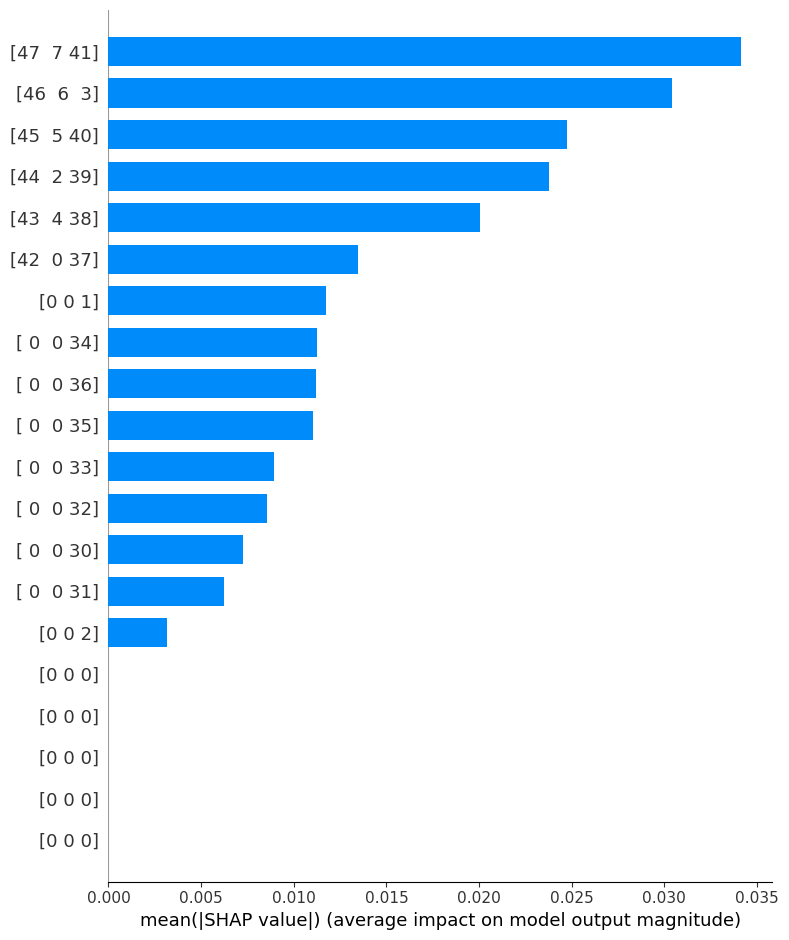

In [66]:
import shap

# Assuming you have your data in X and y (features and target)

# Initialize the SHAP explainer with your model predictions
explainer = shap.Explainer(model_oneshot.predict, X_train)

# Calculate Shapley values for all features
shap_values = explainer(X_train)

# Get the column names of the features
#feature_names = X_train_df.columns

def map_feature_number_to_token(feature_number):
    return str(X_train[:, feature_number])

# Summary plot to visualize feature importances
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=[map_feature_number_to_token(i) for i in range(X_train.shape[1])])
#shap.summary_plot(shap_values, X_train_df, plot_type="bar", feature_names=feature_names)


#shap.plots.waterfall(shap_values[1])

In [150]:
X_train.shape[1]

100

In [148]:
# Assuming your original data is in a Pandas DataFrame named df
# and the 'context' column contains lists of tokens

# Assuming your vector is [47, 7, 41]
vector_indices = [0, 0, 2]

# Assuming you want to access the part of the sentence for the first data point in the DataFrame
data_point_index = 3

# Access the 'context' column of the specific data point
context_tokens = df_one.at[data_point_index, 'context']

# Access the part of the sentence represented by the vector
part_of_sentence = [context_tokens[index] for index in vector_indices]

# Convert the list to a readable string
part_of_sentence_string = ' '.join(part_of_sentence)
print(part_of_sentence_string)

g g r


In [ ]:
#replacing the NA values with a white space
#df.fillna(" ", inplace = True)

# Tokenization

# Undersampling

# Shuffling the data

In [ ]:
#shuffling the data
indices = np.arange(np.array(cls_embeddings).shape[0])
np.random.shuffle(indices)
cls_emb = np.array(cls_embeddings)

cls_emb = cls_emb[indices]

# Splitting the data

# Statistical Analysis

## Exploratory Data Analysis

In the following part of the notebook, I am performing an initial Exploratory Data Analysis (EDA) to get a better insight into the data set and the statistical distribution of the compounds. This step includes a more general distribution analysis of all nominal compounds that have been extracted, but also a more detailed analysis setting apart the enigmatic and the neutral (descriptive) compounds. Specifically, the following distributions will be calculated:

* the total number of compounds (overall + enigmatic vs. descriptive) in each newspaper
* the most frequent compounds (overall + enigmatic vs. descriptive) overall and for each newspaper
* the distribution of compounds (overall + enigmatic vs. descriptive) across the years

#do i even need the overall statistics??? it's not super necessary and becomes obvious when comparing the enigmatic and descriptive compounds

# Distribution of Compounds overall

## Total Number of Compounds by Newspaper

In [1]:
#calculating the total distribution of compounds from each newspaper
#grouping by newspaper source and counting the occurrences with size()
total_news = df_og.groupby('Source')['Compound'].size()

print("Total number of compounds from each newspaper:", "\n", total_news)

Total number of compounds from each newspaper: 
 Source
BILD    10683
FAZ      5580
SZ       3814
Name: Compound, dtype: int64


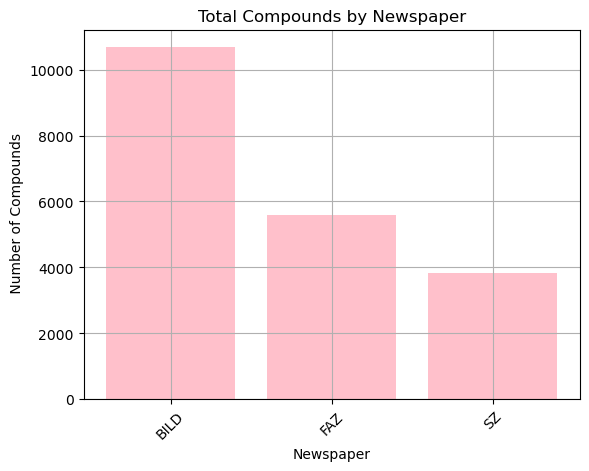

In [2]:
#total number of compounds for each newspaper

#creating a bar plot
plt.bar(total_news.index, total_news.values, color='pink')
plt.xlabel('Newspaper')
plt.ylabel(' Number of Compounds')
plt.title('Total Compounds by Newspaper')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

## Most frequent Compounds overall
using the modified data frame where the compounds were made uniform

In [33]:
#determining the most frequent compound overall
#calculating the frequency of each compound
c_counts = df_mod['Compound'].value_counts()

#getting the 10 most frequent compounds
c_all = c_counts.nlargest(10)

print("The 10 most frequent compounds overall are:", "\n", c_all)

The 10 most frequent compounds overall are: 
 Asylbewerber             576
Flüchtlingsheim          427
Flüchtlingskrise         347
Flüchtlingspolitik       305
Flüchtlingsunterkunft    252
Innenminister            187
Asylverfahren            131
Flüchtlingskind          121
Asylantrag               117
Obergrenze               115
Name: Compound, dtype: int64


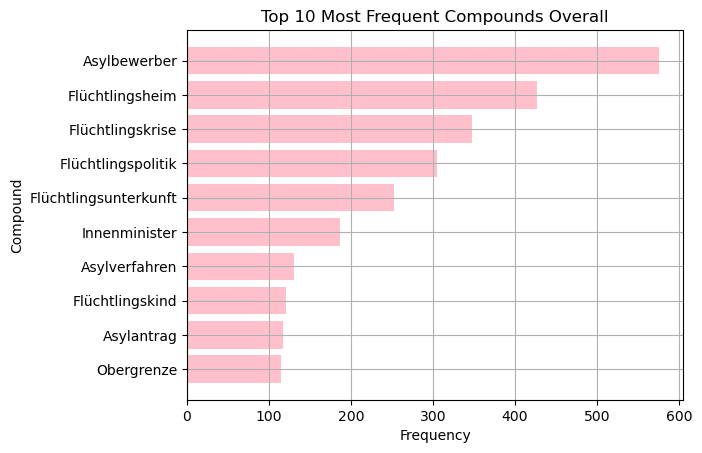

In [34]:
# Create a horizontal bar plot
c_all_sorted = c_all.sort_values(ascending=True)

plt.barh(c_all_sorted.index, c_all_sorted.values, color='pink')
plt.xlabel('Frequency')
plt.ylabel('Compound')
plt.title('Top 10 Most Frequent Compounds Overall')
plt.grid(True)

plt.show()

## Most frequent Compounds by newspaper
(also needs to be tokenized)

In [56]:
#determining the most frequent Compounds for each newspaper
#c_news = df_news.groupby('newspaper')['compound'].value_counts()

#getting the most frequent compounds for each newspaper
#reset_index(drop=True) removes the outer index level, i.e., the newspaper names
year_news = c_news.groupby(level=0).nlargest(10).reset_index(level=0, drop=True)

print("the most frequent compounds for each newspaper are:", "\n", year_news)

the most frequent compounds for each newspaper are: 
 newspaper  compound            
BILD       Asylantrag              5
           Asylheim                5
           Asylpolitik             5
           Asylrecht               5
           Asylunterkunft          5
           Asylverfahren           5
           Brandanschlag           5
           Bundamt                 5
           Bundland                5
           Bundpolizei             5
FAZ        Asylantrag              5
           Asylrecht               5
           Asylunterkunft          5
           Asylverfahren           5
           Bundamt                 5
           Bundregierung           5
           Flüchtlingheim          5
           Flüchtlinghilfe         5
           Flüchtlingpolitik       5
           Flüchtlingunterkunft    5
SZ         Asylantrag              5
           Asylheim                5
           Asylpolitik             5
           Asylrecht               5
           Asylunterkunft 

## Total Number of Compounds by Year

In [32]:
#calculating the distribution of compounds from each year
comp_year = df_og.groupby('Year')['Compound'].size()

print("total number of compounds from each year:", "\n", comp_year)

total number of compounds from each year: 
 Year
2014    1058
2015    5787
2016    7803
2017    3435
2018    1994
Name: Compound, dtype: int64


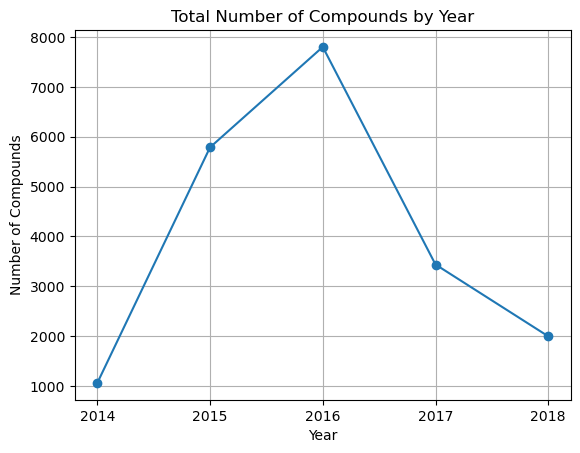

In [20]:
#visualizing the change in number over the years
import matplotlib.pyplot as plt

# Create a line plot
plt.plot(comp_year.index, comp_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Compounds')
plt.title('Total Number of Compounds by Year')
plt.grid(True)
#setting the x-ticks to be the same as the index of the c_year Series, i.e., full years
plt.xticks(c_year.index)

plt.show()

because the compounds are already normalized/ tokenized/ pre-processed, when calculating the most frequent compounds, different forms of the same compound are counted as 1 instance of the base form. this makes this calculation more accurate. however, since the normalisation/ tokenisation/ pre-processing is not perfect, there are instances where the same word was not modified correctly, so that the calculation is not perfect/ completely reliable either. e.g., the originial words Asyl-Recht and Asylrecht are counted as one instance, as they both have been  

# Distribution of enigmatic vs. descriptive

## Total Number of enigmatic vs. descriptive Compounds by Newspaper

In [27]:
#calculating the total distribution of enigmatic compounds from each newspaper
#grouping by newspaper source and counting the occurrences with size()
comp_en_news = df_en.groupby('Source')['Compound'].size()

print("Total number of enigmatic Compounds from each newspaper:", "\n", comp_en_news)

Total number of enigmatic Compounds from each newspaper: 
 Source
BILD    624
FAZ      55
SZ       45
Name: Compound, dtype: int64


In [28]:
#calculating the total distribution of descriptive compounds from each newspaper
#grouping by newspaper source and counting the occurrences with size()
comp_de_news = df_de.groupby('Source')['Compound'].size()

print("Total number of descriptive Compounds from each newspaper:", "\n", comp_de_news)

Total number of descriptive Compounds from each newspaper: 
 Source
BILD    10059
FAZ      5525
SZ       3769
Name: Compound, dtype: int64


## Total Number of enigmatic vs. descriptive Compounds by Year

In [35]:
#calculating the distribution of compounds from each year
comp_year_en = df_en.groupby('Year')['Compound'].size()

print("Total number of enigmatic Compounds from each year:", "\n", comp_year_en)

Total number of enigmatic Compounds from each year: 
 Year
2014     52
2015    227
2016    277
2017     93
2018     75
Name: Compound, dtype: int64


In [34]:
#calculating the distribution of compounds from each year
comp_year_de = df_de.groupby('Year')['Compound'].size()

print("Total number of descriptive Compounds from each year:", "\n", comp_year_de)

Total number of descriptive Compounds from each year: 
 Year
2014    1006
2015    5560
2016    7526
2017    3342
2018    1919
Name: Compound, dtype: int64


## Most frequent enigmatic compounds

### Enigmatic

In [39]:
#determining the most frequent enigmatic compound
#calculating the frequency of each compound
en_counts = df_mod_en['Compound'].value_counts()

#getting the 10 most frequent compounds
en_all = en_counts.nlargest(10)

print("The 10 most frequent enigmatic compounds are:", "\n", en_all)

The 10 most frequent enigmatic compounds are: 
 Flüchtlingsdrama          35
Flüchtlingskind           31
Flüchtlingsboot           25
Messerattacke             16
Flüchtlingsansturm        12
Flüchtlingschaos          10
Flüchtlingsstrom           9
Axtattacke                 9
Flüchtlingskatastrophe     9
Flüchtlingsjunge           7
Name: Compound, dtype: int64


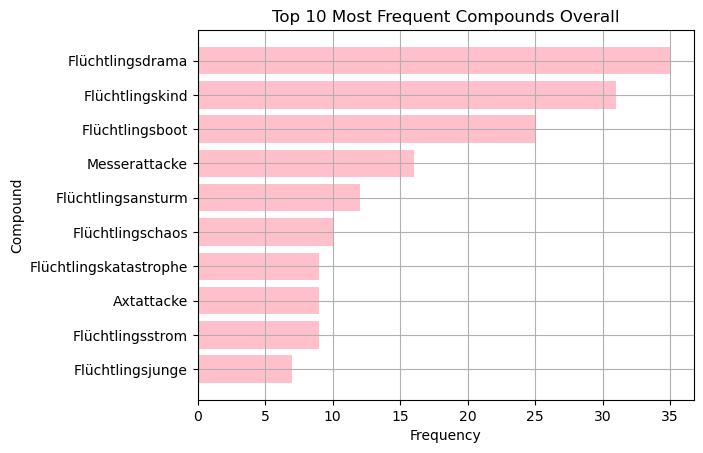

In [40]:
# Create a horizontal bar plot
en_all_sorted = en_all.sort_values(ascending=True)

plt.barh(en_all_sorted.index, en_all_sorted.values, color='pink')
plt.xlabel('Frequency')
plt.ylabel('Compound')
plt.title('Top 10 Most Frequent Compounds Overall')
plt.grid(True)

plt.show()

### Descriptive

In [41]:
#determining the most frequent descriptive compound
#calculating the frequency of each compound
de_counts = df_mod_de['Compound'].value_counts()

#getting the 10 most frequent compounds
de_all = de_counts.nlargest(10)

print("The 10 most frequent descriptive compounds are:", "\n", de_all)

The 10 most frequent descriptive compounds are: 
 Asylbewerber             576
Flüchtlingsheim          427
Flüchtlingskrise         347
Flüchtlingspolitik       305
Flüchtlingsunterkunft    252
Innenminister            187
Asylverfahren            131
Asylantrag               117
Obergrenze               115
Flüchtlingslager         107
Name: Compound, dtype: int64


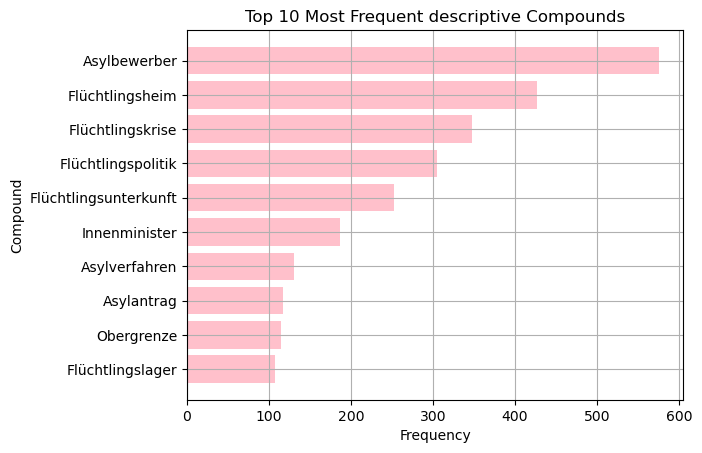

In [42]:
# Create a horizontal bar plot
de_all_sorted = de_all.sort_values(ascending=True)

plt.barh(de_all_sorted.index, de_all_sorted.values, color='pink')
plt.xlabel('Frequency')
plt.ylabel('Compound')
plt.title('Top 10 Most Frequent descriptive Compounds')
plt.grid(True)

plt.show()

## Most common compounds by newspaper

### Enigmatic

In [18]:
#determining the most frequent Compounds for each newspaper
#sorting the compounds by newspaper and counting them
comp_en_news = df_mod_en.groupby('Source')['Compound'].value_counts()

#reset_index(drop=True) removes the outer index level, i.e., the newspaper names
year_en = comp_en_news.groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

print("The most frequent enigmatic compounds for each newspaper:", "\n", year_en)

The most frequent enigmatic compounds for each newspaper: 
 Source  Compound              
BILD    Flüchtlingsdrama          31
        Flüchtlingsboot           25
        Flüchtlingskind           23
        Messerattacke             16
        Flüchtlingsansturm        11
FAZ     Flüchtlingsandrang         3
        Flüchtlingskind            3
        Flüchtlingsfrage           2
        Abschiebewelle             1
        Asylkrise                  1
SZ      Flüchtlingskind            5
        Flüchtlingsdrama           3
        Flüchtlingsfrage           2
        Flüchtlingskatastrophe     2
        Abschleppaktion            1
Name: Compound, dtype: int64


### Descriptive

In [4]:
#determining the most frequent Compounds for each newspaper
comp_de_news = df_mod_de.groupby('Source')['Compound'].value_counts()

#getting the most frequent compounds for each newspaper
#reset_index(drop=True) removes the outer index level, i.e., the newspaper names
year_de = comp_de_news.groupby(level=0).nlargest(10).reset_index(level=0, drop=True)

print("The most frequent compounds for each newspaper:", "\n", year_de)

the most frequent compounds for each newspaper are: 
 Source  Compound             
BILD    Flüchtlingsheim          328
        Asylbewerber             300
        Flüchtlingsunterkunft    187
        Flüchtlingskrise         177
        Flüchtlingspolitik       116
        Brandanschlag             88
        Asylheim                  82
        Innenminister             79
        Flüchtlingskind           76
        Asylunterkunft            69
FAZ     Asylbewerber             161
        Flüchtlingskrise         111
        Flüchtlingspolitik       104
        Flüchtlingsunterkunft     60
        Flüchtlingsheim           52
        Innenminister             51
        Flüchtlingshilfe          46
        Obergrenze                42
        Flüchtlingslager          40
        Asylantrag                39
SZ      Asylbewerber             115
        Flüchtlingspolitik        85
        Flüchtlingskrise          59
        Innenminister             57
        Flüchtlingsheim     

# Most common compounds by newspaper and by year

## Enigmatic

In [19]:
# Determine the most frequent Compounds for each newspaper and each year
# Sort the compounds by year, newspaper, and count them
comp_en_years = df_mod_en.groupby(['Year', 'Source'])['Compound'].value_counts()

# Reset the index to remove the outer index levels (Year and Source)
years_en = comp_en_years.groupby(level=[0, 1]).nlargest(5).reset_index(level=[0, 1], drop=True)

print("The 5 most frequent enigmatic compounds for each newspaper and each year:", years_en)

The 5 most frequent enigmatic compounds for each newspaper and each year: Year  Source  Compound          
2014  BILD    Flüchtlingsdrama      5
              Flüchtlingsansturm    3
              Folterskandal         2
              Afdmann               1
              Asylgegner            1
                                   ..
2018  FAZ     Flüchtlingskind       1
              Migrantenzug          1
      SZ      Bamfskandal           1
              Flüchtlingskind       1
              Migrantenschreck      1
Name: Compound, Length: 65, dtype: int64


In [20]:
years_en[50:]

Year  Source  Compound          
2017  SZ      Asylanarchie          1
              Familienzoff          1
              Terrorhelfer          1
2018  BILD    Abschiebeskandal      5
              Skandalbehörde        4
              Asylskandal           2
              Bamfskandal           2
              Flüchtlingsblogger    2
      FAZ     Blitzabschiebunge     1
              Dauerempörung         1
              Flüchtlingskind       1
              Migrantenzug          1
      SZ      Bamfskandal           1
              Flüchtlingskind       1
              Migrantenschreck      1
Name: Compound, dtype: int64

## Descriptive

In [21]:
# Determine the most frequent Compounds for each newspaper and each year
# Sort the compounds by year, newspaper, and count them
comp_de_years = df_mod_de.groupby(['Year', 'Source'])['Compound'].value_counts()

# Reset the index to remove the outer index levels (Year and Source)
years_de = comp_de_years.groupby(level=[0, 1]).nlargest(5).reset_index(level=[0, 1], drop=True)

print("The 5 most frequent descriptive compounds for each newspaper and each year:", years_de)

The 5 most frequent descriptive compounds for each newspaper and each year: Year  Source  Compound          
2014  BILD    Asylbewerber          16
              Asylheim              16
              Flüchtlingsheim       13
              Asylbewerberheim       5
              Flüchtlingsschule      5
                                    ..
2018  SZ      Innenminister         23
              Asylbewerber          20
              Familiennachzug       14
              Asylsuchender          9
              Flüchtlingspolitik     6
Name: Compound, Length: 75, dtype: int64


In [57]:
years_de[60:]

Year  Source  Compound          
2018  BILD    Asylbewerber          35
              Flüchtlingsheim       15
              Flüchtlingshotel       9
              Innenminister          9
              Bamfskandal            8
      FAZ     Asylbewerber          18
              Innenminister         15
              Asylpolitik           14
              Familiennachzug       10
              Flüchtlingspolitik     9
      SZ      Innenminister         23
              Asylbewerber          20
              Familiennachzug       14
              Asylsuchender          9
              Flüchtlingspolitik     6
Name: Compound, dtype: int64

## Stat Analysis
Group the data by the newspaper source and count the occurrences of each nominal compound. You can use the groupby() function in pandas and apply the value_counts() function to each group.

In [37]:
#exploring the descriptive statistics of the compound counts, such as mean, 
#median, minimum, maximum, and quartiles, using the describe() function:
#compound_counts = df_news.groupby('newspaper')['compound'].value_counts()
compound_counts.describe()

#how to interpret this??

count    5316.000000
mean        1.302295
std         0.741615
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: compound, dtype: float64

In [36]:
#c_counts = df_news['compound'].value_counts()
c_counts.describe()


#why is there a difference between c_counts and compound_counts???

count    4181.000000
mean        1.655824
std         1.675444
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: compound, dtype: float64

In [22]:
#conducting a chi-square statistical test 
#to determine if there are significant differences in the distribution 
#of enigmatic and descriptive compounds between newspapers. 
#using the library scipy to perform this test

import pandas as pd
from scipy.stats import chi2_contingency

#creating a contingency table
contingency_table = pd.crosstab(df_og['Source'], df_og['Annotation'])

#performing the Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-squared value:", chi2)
print("p-value:", p)

# You can interpret the p-value to determine significance
#If the p-value is below a chosen significance level (e.g., 0.05), 
#you can conclude that there is a significant association between the variables.

Chi-squared value: 328.32883835984796
p-value: 5.061725917960805e-72


With a very low p-value of 5.06e-72, there is a significant association between the class of compounds and the newspapers. Thus the Null Hypothesis (=the observed results occurred by random chance alone) can be rejected with very high certainty due to an extremely low probability of the Null Hypothesis being true. This means that when a descriptive vs. an enigmatic compound is used in a newspaper can be predicted, as it is not random. This is in line with previous observations of the reporting style of tabloid media, such as BILD, in contrast to the more serious and less sensational reporting style of quality newspapers, as FAZ and SZ. To sum up, this explains the differences in the use of enigmatic compounds between the three newspapers.

# The Language Model

# Preprocessing for the Automated Detection Task

Since the code was manually annotated by myself, there will be no missing values (NAs) in either DataFrame. Thus, even though common practice in the preprocessing step in NLP tasks, I will refrain from checking for and removing NAs.

Due to their nature, it is that this data does not yield a huge number of enigmatic compounds. This became evident already during the manual annotation, but to visualize this, the difference in class balance is illustrated in the following:

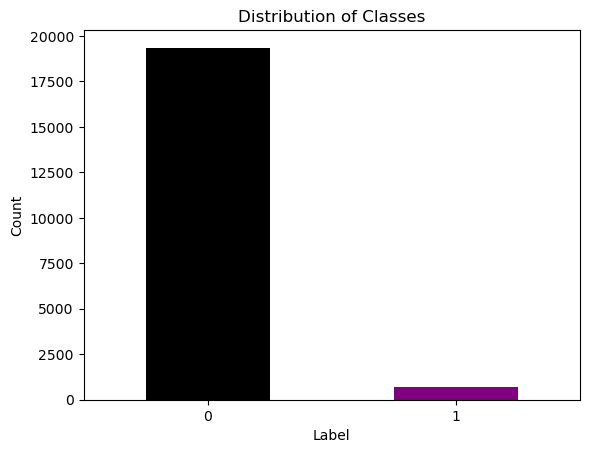

In [26]:
#plotting the data distribution according to the classes 0 = 'real' and 1 = 'fraudulent'
counts = df_mod['Annotation'].value_counts()
counts.plot(kind='bar', color=['black', 'purple'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks(rotation=0)
plt.show()

Working with imbalanced data is generally not recommended, as it can lead to a preference for the majority class (in this case the descriptive compounds) as well as overfitting (source). 
There are two alternatives to deal with imbalanced data: over- and undersampling. In cases of extreme class imbalances, oversampling would create an impractical number of fabricated examples, thus undersampling poses as a practical alternative. This means, the data set of the descriptive compounds was drastically reduced to match with the minority class.

In [24]:
#checking the length of the descriptive DataFrame
len(df_mod_de)

19353

In [25]:
#checking the length of the enigmatic DataFrame
len(df_mod_en)

724

In [28]:
#removing random samples from the descriptive DataFrame to match with the size
#of the enigmatic DataFrame
import pandas as pd
import numpy as np

len_en = len(df_mod_en)

# Randomly sample from df_mod_de to match the length of df_mod_en
if len(df_mod_de) > len_en:
    # Set a seed for reproducibility
    np.random.seed(42)
    # Randomly shuffle the larger DataFrame
    df_mod_de = df_mod_de.sample(n=len_en, random_state=42)

In [29]:
#checking whether the descriptive DataFrame has the correct length
len(df_mod_de)

724

As the DataFrames have already been cleaned and lemmatized, they will now be tokenized and further processed so that they can be used as input for the language model. Generally, this includes converting the tokenized text to sequences and then padding those, and splitting the data into training and test sets.

In [45]:
#combining the information from both the descriptive as well as enigmatic 
#DataFrames into the text column of the new DataFrame df_LM
import pandas as pd

# Concatenate the dataframes vertically
df_LM = pd.concat([df_mod_de[['Compound', 'Title', 'Annotation']], df_mod_en[['Compound', 'Title', 'Annotation']]])

# Reset the index of the new dataframe
df_LM.reset_index(drop=True, inplace=True)

In [46]:
#adding the compounds into the title column to provide context for the target
#as well as adding a marker around the target so that the model can differentiate
#between the title and the compound
df_LM['Title'] = df_LM['Title'] + " " + "[TARGET]" + df_LM['Compound'] + "[ENDTARGET]"
df_LM['Title'][0]

'Noch Ehrenamtler gesucht: Sporthalle in Oberursel erwartet 1000 Flüchtlinge [TARGET]Ehrenamtler[ENDTARGET]'

## Tokenization

For the tokenization, a general process for NLP tasks is implemented, including defining the input dimensions and the built-in keras Tokenizer used for language models.
As the labels are already binary, there is no need to one-hot encode the labels for this model, which is one of the requirements. Thus, the labels are merely transformed into a Numpy array, so ensure that all of the tensors have the same shape.

In [52]:
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#defining the lengths of the input
#using the first 100 words of each headline (the headlines are not longer than 100 words)
max_len = 100
#using the first 10k words from the data set
vocab_size = 10000

text = df_LM['Title']
#transforming the ratings from the column 'fraudulent' into a numpy array
labels = df_LM['Annotation'].values

#tokenizing
tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
#creating the mapping between words and integers
#to convert new text into a sequence of integers -> model input
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)  

#creating a dictionary where each word is a key 
#and the index is the corresponding value
word_index = tokenizer.word_index  

#padding the sequences, so that they are the same length
data = pad_sequences(sequences, maxlen=max_len) 

#shuffling the data so that it is random
indices = np.arange(data.shape[0]) 
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

## Training and test data split

In [54]:
from sklearn.model_selection import train_test_split

y = labels
X = data

#splitting the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

#creating a validation set from the training data set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

For the data split, the entire data set is first split into training and test sets. Then, the training set is split into a smaller training and validation set. This process is most commonly used for this type of classification task, as it retains comparability. The function train_test_split form the sklearn library is used for this. It has predefined parameters according to which is splits the data.

The random_state parameter was set to 1, so for every iteration of the model, the data split stays the same.

# Model Definition and Compiling
My data set consists of two classes: enigmatic (1) and neutral (descriptive) compounds (0). Thus, I am using Logistic Regression, as it is specifically designed for binary classification. LR calculates a probability estimate (between 0 and 1) for each item according to which class it belongs. The closer the probability score is to 1, the higher the confidence of the model that a specific instance belongs to class 1, i.e., the enigmatic compounds in this case.
Logistic Regression is easy to interpret due to this simple classification.

## One Shot Learning
Before the data set was fully annotated (80% of it should be annotated lmao -> 5538 compounds), I tried one-shot (and maybe few shot) learning first and examined the results. One-shot learning is a reasonable approach in instances where the data set is very small. Even after the annotation, this data set will not be as big as usual data sets used to train language models. 

Using a sequential model from tenserflow (say more about this), and ... (talk about the model structure)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout 

#setting the random seed so that the weights stay the same
np.random.seed(114)

#defining the model
#setting the output dimensions to 20
out_dim=20
#using a sequential model
model = Sequential(name = "model")
#using an embedding, LSTM, and dense layer
model.add(Embedding(vocab_size,out_dim,input_length=max_len))
model.add(Bidirectional(LSTM(10 )))
#model.add(Dropout(0.3))  # Add a Dropout layer with a dropout rate of 0.5 (you can adjust the rate)
model.add(Dense(1,activation='sigmoid'))
#compiling the model, i.e., setting the parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 20)           200000    
                                                                 
 bidirectional_5 (Bidirectio  (None, 20)               2480      
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 202,501
Trainable params: 202,501
Non-trainable params: 0
_________________________________________________________________
None


# Fitting the model

In [22]:
#fitting the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
29/29 [==============================] - 6s 82ms/step - loss: 0.6922 - accuracy: 0.5356 - val_loss: 0.6898 - val_accuracy: 0.6767
Epoch 2/10
29/29 [==============================] - 2s 53ms/step - loss: 0.6812 - accuracy: 0.6166 - val_loss: 0.6765 - val_accuracy: 0.7500
Epoch 3/10
29/29 [==============================] - 2s 53ms/step - loss: 0.6278 - accuracy: 0.8067 - val_loss: 0.6181 - val_accuracy: 0.7672
Epoch 4/10
29/29 [==============================] - 2s 52ms/step - loss: 0.5259 - accuracy: 0.8726 - val_loss: 0.5685 - val_accuracy: 0.7543
Epoch 5/10
29/29 [==============================] - 2s 53ms/step - loss: 0.3809 - accuracy: 0.9557 - val_loss: 0.5207 - val_accuracy: 0.7672
Epoch 6/10
29/29 [==============================] - 2s 61ms/step - loss: 0.2339 - accuracy: 0.9708 - val_loss: 0.4960 - val_accuracy: 0.7672
Epoch 7/10
29/29 [==============================] - 2s 54ms/step - loss: 0.2240 - accuracy: 0.9287 - val_loss: 0.5570 - val_accuracy: 0.7241
Epoch 8/10
29

# Plotting the model's performance

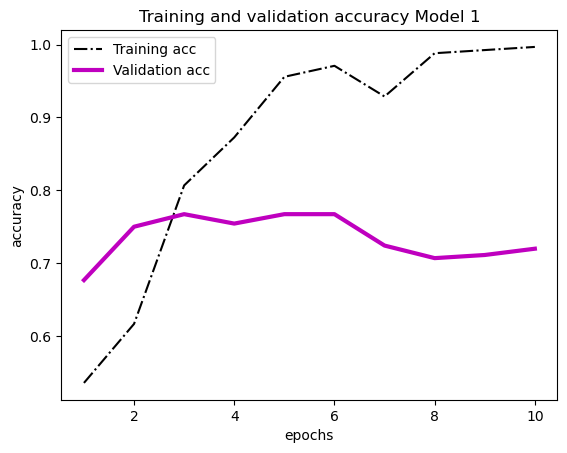

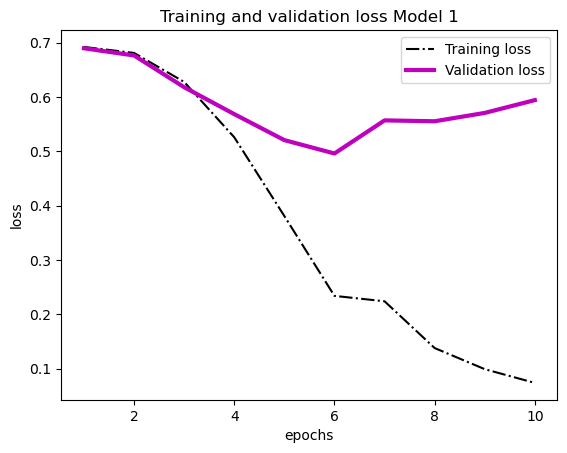

In [23]:
#import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'k', linestyle = 'dashdot', label='Training acc')
plt.plot(epochs, val_acc, 'm', linewidth = '3', label='Validation acc')
plt.title('Training and validation accuracy Model 1')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'k', linestyle = 'dashdot', label='Training loss')
plt.plot(epochs, val_loss, 'm', linewidth = '3', label='Validation loss')
plt.title('Training and validation loss Model 1')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

# Evaluation of the model

In [24]:
print('Evaluating the model on the test data:')
results = model.evaluate(X_test, y_test)

Evaluating the model on the test data:
10/10 [==============================] - 0s 11ms/step - loss: 0.6798 - accuracy: 0.6862


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

#predicting on the test data
y_pred = model.predict(X_test)
y_pred = np.around(y_pred, decimals=0)

print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('classification report:',classification_report(y_test,y_pred, target_names=['0', '1']))

10/10 [==============================] - 1s 13ms/step
confusion matrix: [[107  48]
 [ 43  92]]
classification report:               precision    recall  f1-score   support

           0       0.71      0.69      0.70       155
           1       0.66      0.68      0.67       135

    accuracy                           0.69       290
   macro avg       0.69      0.69      0.69       290
weighted avg       0.69      0.69      0.69       290



In [ ]:
#getting the macro F1 score for the model


# Feature Importance Analysis
Once the model is trained, you can extract the feature importance scores. The method for obtaining these scores depends on the model and the analysis technique you choose. One would be Shapley values, which offer a game-theoretic approach to calculate the contribution of each feature by considering all possible feature combinations. They provide a fair allocation of importance to each feature by measuring their impact on the model's predictions.

67/67 [==============================] - 1s 11ms/step


Permutation explainer:   0%|          | 1/1448 [00:00<?, ?it/s]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:   0%|          | 3/1448 [00:21<1:59:06,  4.95s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:   0%|          | 4/1448 [00:28<2:27:45,  6.14s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:   0%|          | 5/1448 [00:39<3:05:11,  7.70s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:   0%|          | 6/1448 [00:47<3:08:53,  7.86s/it]

50/50 [==============================] - 1s 12ms/step


Permutation explainer:   0%|          | 7/1448 [00:55<3:13:42,  8.07s/it]

110/110 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 8/1448 [01:14<4:37:17, 11.55s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 9/1448 [01:24<4:23:11, 10.97s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 10/1448 [01:33<4:09:06, 10.39s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 11/1448 [01:42<3:56:13,  9.86s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 12/1448 [01:50<3:44:36,  9.38s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 13/1448 [02:00<3:45:50,  9.44s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 14/1448 [02:08<3:40:25,  9.22s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 15/1448 [02:16<3:28:12,  8.72s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 16/1448 [02:24<3:26:04,  8.63s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 17/1448 [02:33<3:23:44,  8.54s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:   1%|          | 18/1448 [02:41<3:24:50,  8.60s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:   1%|▏         | 19/1448 [02:51<3:29:30,  8.80s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:   1%|▏         | 20/1448 [03:00<3:33:04,  8.95s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:   1%|▏         | 21/1448 [03:09<3:30:39,  8.86s/it]

77/77 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 22/1448 [03:18<3:33:32,  8.98s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 23/1448 [03:25<3:20:00,  8.42s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 24/1448 [03:31<3:03:55,  7.75s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 25/1448 [03:40<3:08:10,  7.93s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 26/1448 [03:48<3:08:44,  7.96s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 27/1448 [03:56<3:14:54,  8.23s/it]

71/71 [==============================] - 1s 12ms/step


Permutation explainer:   2%|▏         | 28/1448 [04:06<3:22:29,  8.56s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 29/1448 [04:12<3:09:04,  7.99s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 30/1448 [04:21<3:14:17,  8.22s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 31/1448 [04:30<3:18:43,  8.41s/it]

55/55 [==============================] - 1s 12ms/step


Permutation explainer:   2%|▏         | 32/1448 [04:38<3:16:27,  8.32s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 33/1448 [04:48<3:23:33,  8.63s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 34/1448 [04:55<3:16:32,  8.34s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 35/1448 [05:04<3:17:18,  8.38s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:   2%|▏         | 36/1448 [05:12<3:13:20,  8.22s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 37/1448 [05:19<3:08:04,  8.00s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 38/1448 [05:26<3:03:46,  7.82s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 39/1448 [05:34<3:04:41,  7.86s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 40/1448 [05:43<3:10:40,  8.13s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 41/1448 [05:58<3:55:26, 10.04s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 42/1448 [06:06<3:40:30,  9.41s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 43/1448 [06:14<3:33:28,  9.12s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 44/1448 [06:21<3:21:11,  8.60s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 45/1448 [06:29<3:14:42,  8.33s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 46/1448 [06:36<3:07:47,  8.04s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 47/1448 [06:45<3:09:25,  8.11s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:   3%|▎         | 48/1448 [06:53<3:09:43,  8.13s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:   3%|▎         | 49/1448 [07:01<3:07:32,  8.04s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:   3%|▎         | 50/1448 [07:08<2:59:18,  7.70s/it]

77/77 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▎         | 51/1448 [07:17<3:08:50,  8.11s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▎         | 52/1448 [07:23<2:57:56,  7.65s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▎         | 53/1448 [07:32<3:05:33,  7.98s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▎         | 54/1448 [07:39<2:58:43,  7.69s/it]

76/76 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▍         | 55/1448 [07:49<3:16:18,  8.46s/it]

72/72 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▍         | 56/1448 [07:59<3:24:47,  8.83s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▍         | 57/1448 [08:06<3:15:12,  8.42s/it]

50/50 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▍         | 58/1448 [08:13<3:01:18,  7.83s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:   4%|▍         | 59/1448 [08:19<2:50:26,  7.36s/it]

54/54 [==============================] - 1s 9ms/step


Permutation explainer:   4%|▍         | 60/1448 [08:26<2:46:28,  7.20s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▍         | 61/1448 [08:33<2:47:22,  7.24s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▍         | 62/1448 [08:40<2:43:35,  7.08s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▍         | 63/1448 [08:49<2:57:10,  7.68s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▍         | 64/1448 [08:58<3:03:16,  7.95s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:   4%|▍         | 65/1448 [09:04<2:52:02,  7.46s/it]

57/57 [==============================] - 1s 9ms/step


Permutation explainer:   5%|▍         | 66/1448 [09:11<2:47:48,  7.29s/it]

66/66 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▍         | 67/1448 [09:20<3:01:22,  7.88s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▍         | 68/1448 [09:27<2:53:25,  7.54s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▍         | 69/1448 [09:33<2:43:20,  7.11s/it]

60/60 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▍         | 70/1448 [09:43<3:03:26,  7.99s/it]

76/76 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▍         | 71/1448 [09:52<3:11:42,  8.35s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▍         | 72/1448 [10:01<3:12:43,  8.40s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▌         | 73/1448 [10:09<3:08:15,  8.21s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▌         | 74/1448 [10:16<3:04:04,  8.04s/it]

45/45 [==============================] - 1s 11ms/step


Permutation explainer:   5%|▌         | 75/1448 [10:25<3:10:35,  8.33s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▌         | 76/1448 [10:35<3:20:36,  8.77s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▌         | 77/1448 [10:42<3:09:24,  8.29s/it]

79/79 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▌         | 78/1448 [10:52<3:20:45,  8.79s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:   5%|▌         | 79/1448 [11:01<3:18:16,  8.69s/it]

77/77 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▌         | 80/1448 [11:09<3:15:39,  8.58s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▌         | 81/1448 [11:17<3:12:17,  8.44s/it]

50/50 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▌         | 82/1448 [11:25<3:08:45,  8.29s/it]

85/85 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▌         | 83/1448 [11:35<3:22:48,  8.91s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▌         | 84/1448 [11:43<3:16:25,  8.64s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:   6%|▌         | 85/1448 [11:51<3:07:58,  8.27s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:   6%|▌         | 86/1448 [12:06<3:52:24, 10.24s/it]

122/122 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▌         | 87/1448 [12:25<4:54:00, 12.96s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▌         | 88/1448 [12:36<4:42:52, 12.48s/it]

129/129 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▌         | 89/1448 [12:57<5:40:11, 15.02s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▌         | 90/1448 [13:05<4:52:08, 12.91s/it]

49/49 [==============================] - 0s 10ms/step


Permutation explainer:   6%|▋         | 91/1448 [13:14<4:23:37, 11.66s/it]

48/48 [==============================] - 0s 9ms/step


Permutation explainer:   6%|▋         | 92/1448 [13:22<3:59:07, 10.58s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▋         | 93/1448 [13:31<3:46:55, 10.05s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:   6%|▋         | 94/1448 [13:40<3:40:16,  9.76s/it]

77/77 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 95/1448 [13:49<3:37:04,  9.63s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 96/1448 [13:58<3:33:49,  9.49s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:   7%|▋         | 97/1448 [14:08<3:38:21,  9.70s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 98/1448 [14:16<3:22:43,  9.01s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:   7%|▋         | 99/1448 [14:31<4:01:04, 10.72s/it]

94/94 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 100/1448 [14:46<4:29:38, 12.00s/it]

81/81 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 101/1448 [14:55<4:13:48, 11.31s/it]

68/68 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 102/1448 [15:05<4:00:12, 10.71s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 103/1448 [15:12<3:37:57,  9.72s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 104/1448 [15:19<3:20:33,  8.95s/it]

49/49 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 105/1448 [15:27<3:13:16,  8.63s/it]

85/85 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 106/1448 [15:37<3:18:44,  8.89s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:   7%|▋         | 107/1448 [15:44<3:06:54,  8.36s/it]

60/60 [==============================] - 1s 10ms/step


Permutation explainer:   7%|▋         | 108/1448 [15:52<3:06:08,  8.33s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 109/1448 [16:01<3:09:43,  8.50s/it]

73/73 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 110/1448 [16:10<3:15:37,  8.77s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 111/1448 [16:19<3:18:01,  8.89s/it]

47/47 [==============================] - 0s 10ms/step


Permutation explainer:   8%|▊         | 112/1448 [16:27<3:08:02,  8.45s/it]

49/49 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 113/1448 [16:34<3:01:46,  8.17s/it]

68/68 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 114/1448 [16:44<3:09:45,  8.54s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 115/1448 [16:51<3:02:19,  8.21s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 116/1448 [16:58<2:50:08,  7.66s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 117/1448 [17:06<2:52:58,  7.80s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 118/1448 [17:14<2:57:44,  8.02s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 119/1448 [17:21<2:49:42,  7.66s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 120/1448 [17:29<2:52:11,  7.78s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:   8%|▊         | 121/1448 [17:38<2:58:01,  8.05s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:   8%|▊         | 122/1448 [17:46<3:01:03,  8.19s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:   8%|▊         | 123/1448 [17:55<3:04:09,  8.34s/it]

50/50 [==============================] - 1s 10ms/step


Permutation explainer:   9%|▊         | 124/1448 [18:01<2:49:30,  7.68s/it]

49/49 [==============================] - 1s 10ms/step


Permutation explainer:   9%|▊         | 125/1448 [18:08<2:44:57,  7.48s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:   9%|▊         | 126/1448 [18:16<2:46:03,  7.54s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:   9%|▉         | 127/1448 [18:23<2:45:52,  7.53s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:   9%|▉         | 128/1448 [18:34<3:04:09,  8.37s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:   9%|▉         | 129/1448 [18:41<2:58:26,  8.12s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:   9%|▉         | 130/1448 [18:48<2:51:02,  7.79s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:   9%|▉         | 131/1448 [18:56<2:53:59,  7.93s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:   9%|▉         | 132/1448 [19:05<2:55:38,  8.01s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:   9%|▉         | 133/1448 [19:14<3:01:03,  8.26s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:   9%|▉         | 134/1448 [19:22<3:01:59,  8.31s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:   9%|▉         | 135/1448 [19:32<3:12:08,  8.78s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:   9%|▉         | 136/1448 [19:40<3:08:28,  8.62s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:   9%|▉         | 137/1448 [19:49<3:11:41,  8.77s/it]

46/46 [==============================] - 1s 11ms/step


Permutation explainer:  10%|▉         | 138/1448 [19:57<3:08:28,  8.63s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  10%|▉         | 139/1448 [20:06<3:05:43,  8.51s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  10%|▉         | 140/1448 [20:13<3:00:44,  8.29s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  10%|▉         | 141/1448 [20:23<3:09:47,  8.71s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  10%|▉         | 142/1448 [20:31<3:03:21,  8.42s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  10%|▉         | 143/1448 [20:39<3:02:47,  8.40s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  10%|▉         | 144/1448 [20:49<3:07:53,  8.65s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  10%|█         | 145/1448 [20:57<3:08:49,  8.70s/it]

54/54 [==============================] - 1s 12ms/step


Permutation explainer:  10%|█         | 146/1448 [21:05<3:04:54,  8.52s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  10%|█         | 147/1448 [21:14<3:04:02,  8.49s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  10%|█         | 148/1448 [21:22<3:00:42,  8.34s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  10%|█         | 149/1448 [21:31<3:04:19,  8.51s/it]

94/94 [==============================] - 1s 11ms/step


Permutation explainer:  10%|█         | 150/1448 [21:44<3:35:07,  9.94s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  10%|█         | 151/1448 [21:52<3:23:15,  9.40s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  10%|█         | 152/1448 [22:00<3:12:07,  8.89s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  11%|█         | 153/1448 [22:08<3:07:31,  8.69s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█         | 154/1448 [22:17<3:09:03,  8.77s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█         | 155/1448 [22:25<3:01:38,  8.43s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█         | 156/1448 [22:32<2:57:16,  8.23s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█         | 157/1448 [22:42<3:03:00,  8.51s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█         | 158/1448 [22:51<3:06:53,  8.69s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█         | 159/1448 [23:01<3:15:52,  9.12s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█         | 160/1448 [23:11<3:20:21,  9.33s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█         | 161/1448 [23:19<3:14:52,  9.09s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█         | 162/1448 [23:28<3:13:55,  9.05s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█▏        | 163/1448 [23:37<3:10:25,  8.89s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█▏        | 164/1448 [23:46<3:16:14,  9.17s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█▏        | 165/1448 [23:54<3:04:15,  8.62s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  11%|█▏        | 166/1448 [24:03<3:07:22,  8.77s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  12%|█▏        | 167/1448 [24:11<3:00:45,  8.47s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 168/1448 [24:18<2:55:51,  8.24s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 169/1448 [24:27<2:58:15,  8.36s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 170/1448 [24:35<2:56:43,  8.30s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 171/1448 [24:43<2:55:22,  8.24s/it]

88/88 [==============================] - 1s 12ms/step


Permutation explainer:  12%|█▏        | 172/1448 [25:00<3:45:54, 10.62s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 173/1448 [25:07<3:24:33,  9.63s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 174/1448 [25:15<3:15:01,  9.19s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 175/1448 [25:22<3:04:17,  8.69s/it]

73/73 [==============================] - 1s 12ms/step


Permutation explainer:  12%|█▏        | 176/1448 [25:32<3:11:32,  9.03s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 177/1448 [25:40<3:03:49,  8.68s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 178/1448 [25:49<3:06:38,  8.82s/it]

46/46 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 179/1448 [25:56<2:55:46,  8.31s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▏        | 180/1448 [26:04<2:53:28,  8.21s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  12%|█▎        | 181/1448 [26:13<2:57:02,  8.38s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 182/1448 [26:22<3:00:21,  8.55s/it]

79/79 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 183/1448 [26:33<3:13:00,  9.15s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 184/1448 [26:41<3:07:12,  8.89s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 185/1448 [26:51<3:13:59,  9.22s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 186/1448 [26:57<2:54:42,  8.31s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 187/1448 [27:06<2:56:18,  8.39s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 188/1448 [27:15<2:59:47,  8.56s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 189/1448 [27:24<3:04:46,  8.81s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 190/1448 [27:31<2:54:09,  8.31s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 191/1448 [27:39<2:51:49,  8.20s/it]

77/77 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 192/1448 [27:48<2:56:34,  8.44s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 193/1448 [27:56<2:53:19,  8.29s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 194/1448 [28:03<2:42:37,  7.78s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  13%|█▎        | 195/1448 [28:10<2:41:53,  7.75s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▎        | 196/1448 [28:18<2:43:15,  7.82s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▎        | 197/1448 [28:26<2:43:27,  7.84s/it]

69/69 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▎        | 198/1448 [28:35<2:48:09,  8.07s/it]

69/69 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▎        | 199/1448 [28:43<2:48:12,  8.08s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▍        | 200/1448 [28:52<2:54:48,  8.40s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▍        | 201/1448 [29:00<2:50:15,  8.19s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▍        | 202/1448 [29:08<2:47:04,  8.05s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▍        | 203/1448 [29:21<3:21:18,  9.70s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  14%|█▍        | 204/1448 [29:29<3:12:39,  9.29s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▍        | 205/1448 [29:38<3:09:08,  9.13s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▍        | 206/1448 [29:46<2:57:52,  8.59s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▍        | 207/1448 [29:54<2:59:19,  8.67s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▍        | 208/1448 [30:02<2:55:16,  8.48s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  14%|█▍        | 209/1448 [30:11<2:55:24,  8.49s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▍        | 210/1448 [30:20<2:59:05,  8.68s/it]

45/45 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▍        | 211/1448 [30:28<2:52:50,  8.38s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▍        | 212/1448 [30:37<2:59:13,  8.70s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▍        | 213/1448 [30:45<2:56:03,  8.55s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▍        | 214/1448 [30:54<2:56:53,  8.60s/it]

79/79 [==============================] - 1s 12ms/step


Permutation explainer:  15%|█▍        | 215/1448 [31:04<3:06:06,  9.06s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▍        | 216/1448 [31:13<3:04:54,  9.00s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▍        | 217/1448 [31:21<2:57:23,  8.65s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▌        | 218/1448 [31:30<2:59:54,  8.78s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▌        | 219/1448 [31:38<2:57:50,  8.68s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▌        | 220/1448 [31:46<2:50:53,  8.35s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▌        | 221/1448 [32:04<3:48:31, 11.17s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▌        | 222/1448 [32:13<3:36:08, 10.58s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▌        | 223/1448 [32:21<3:18:59,  9.75s/it]

79/79 [==============================] - 1s 11ms/step


Permutation explainer:  15%|█▌        | 224/1448 [32:32<3:30:38, 10.33s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 225/1448 [32:44<3:36:14, 10.61s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 226/1448 [32:52<3:20:32,  9.85s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 227/1448 [33:00<3:08:12,  9.25s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 228/1448 [33:09<3:11:06,  9.40s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 229/1448 [33:17<3:00:14,  8.87s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 230/1448 [33:26<3:00:53,  8.91s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 231/1448 [33:33<2:48:40,  8.32s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 232/1448 [33:46<3:18:05,  9.77s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 233/1448 [33:54<3:05:08,  9.14s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 234/1448 [34:02<2:57:52,  8.79s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▌        | 235/1448 [34:11<3:02:41,  9.04s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▋        | 236/1448 [34:21<3:03:10,  9.07s/it]

77/77 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▋        | 237/1448 [34:29<3:00:34,  8.95s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  16%|█▋        | 238/1448 [34:37<2:52:28,  8.55s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  17%|█▋        | 239/1448 [34:46<2:54:20,  8.65s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 240/1448 [34:54<2:52:18,  8.56s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 241/1448 [35:10<3:36:08, 10.74s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  17%|█▋        | 242/1448 [35:18<3:21:53, 10.04s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 243/1448 [35:27<3:11:06,  9.52s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 244/1448 [35:36<3:08:42,  9.40s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 245/1448 [35:44<2:59:40,  8.96s/it]

74/74 [==============================] - 1s 10ms/step


Permutation explainer:  17%|█▋        | 246/1448 [35:53<2:59:03,  8.94s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:  17%|█▋        | 247/1448 [36:02<2:59:16,  8.96s/it]

62/62 [==============================] - 1s 10ms/step


Permutation explainer:  17%|█▋        | 248/1448 [36:11<3:02:32,  9.13s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 249/1448 [36:19<2:57:40,  8.89s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 250/1448 [36:27<2:51:19,  8.58s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 251/1448 [36:34<2:42:23,  8.14s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 252/1448 [36:46<3:05:58,  9.33s/it]

46/46 [==============================] - 1s 11ms/step


Permutation explainer:  17%|█▋        | 253/1448 [36:55<2:59:21,  9.01s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 254/1448 [37:03<2:56:33,  8.87s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 255/1448 [37:18<3:31:27, 10.63s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 256/1448 [37:25<3:11:38,  9.65s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 257/1448 [37:34<3:03:31,  9.25s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 258/1448 [37:41<2:53:29,  8.75s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 259/1448 [37:50<2:50:24,  8.60s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 260/1448 [37:58<2:51:30,  8.66s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 261/1448 [38:07<2:52:28,  8.72s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 262/1448 [38:16<2:50:33,  8.63s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 263/1448 [38:24<2:50:58,  8.66s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 264/1448 [38:33<2:52:46,  8.76s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 265/1448 [38:41<2:49:11,  8.58s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 266/1448 [38:49<2:41:08,  8.18s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  18%|█▊        | 267/1448 [38:57<2:38:54,  8.07s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▊        | 268/1448 [39:05<2:43:42,  8.32s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▊        | 269/1448 [39:12<2:30:31,  7.66s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▊        | 270/1448 [39:21<2:41:15,  8.21s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▊        | 271/1448 [39:29<2:37:26,  8.03s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▉        | 272/1448 [39:36<2:35:56,  7.96s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  19%|█▉        | 273/1448 [39:45<2:41:23,  8.24s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▉        | 274/1448 [39:53<2:37:26,  8.05s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▉        | 275/1448 [40:01<2:37:52,  8.08s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▉        | 276/1448 [40:10<2:41:08,  8.25s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▉        | 277/1448 [40:19<2:45:19,  8.47s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▉        | 278/1448 [40:29<2:53:34,  8.90s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▉        | 279/1448 [40:46<3:45:35, 11.58s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▉        | 280/1448 [40:55<3:29:08, 10.74s/it]

50/50 [==============================] - 1s 10ms/step


Permutation explainer:  19%|█▉        | 281/1448 [41:02<3:07:41,  9.65s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  19%|█▉        | 282/1448 [41:09<2:47:34,  8.62s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█▉        | 283/1448 [41:17<2:47:24,  8.62s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█▉        | 284/1448 [41:24<2:37:41,  8.13s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█▉        | 285/1448 [41:32<2:38:00,  8.15s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  20%|█▉        | 286/1448 [41:40<2:35:02,  8.01s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█▉        | 287/1448 [41:48<2:33:19,  7.92s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█▉        | 288/1448 [41:57<2:39:33,  8.25s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█▉        | 289/1448 [42:04<2:35:34,  8.05s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  20%|██        | 290/1448 [42:14<2:43:34,  8.48s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  20%|██        | 291/1448 [42:22<2:42:26,  8.42s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  20%|██        | 292/1448 [42:31<2:45:30,  8.59s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  20%|██        | 293/1448 [42:39<2:40:07,  8.32s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  20%|██        | 294/1448 [42:47<2:39:55,  8.31s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  20%|██        | 295/1448 [42:59<3:02:10,  9.48s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  20%|██        | 296/1448 [43:08<2:57:43,  9.26s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 297/1448 [43:17<2:54:25,  9.09s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 298/1448 [43:24<2:42:29,  8.48s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 299/1448 [43:33<2:47:35,  8.75s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 300/1448 [43:41<2:44:27,  8.60s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 301/1448 [43:50<2:42:03,  8.48s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 302/1448 [43:59<2:48:13,  8.81s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 303/1448 [44:08<2:48:21,  8.82s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  21%|██        | 304/1448 [44:16<2:43:54,  8.60s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 305/1448 [44:24<2:37:41,  8.28s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 306/1448 [44:34<2:47:47,  8.82s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██        | 307/1448 [44:43<2:48:10,  8.84s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██▏       | 308/1448 [44:52<2:48:07,  8.85s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██▏       | 309/1448 [45:00<2:45:30,  8.72s/it]

91/91 [==============================] - 1s 10ms/step


Permutation explainer:  21%|██▏       | 310/1448 [45:13<3:11:42, 10.11s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  21%|██▏       | 311/1448 [45:23<3:07:37,  9.90s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  22%|██▏       | 312/1448 [45:30<2:54:31,  9.22s/it]

74/74 [==============================] - 1s 10ms/step


Permutation explainer:  22%|██▏       | 313/1448 [45:40<2:56:18,  9.32s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 314/1448 [45:49<2:54:36,  9.24s/it]

79/79 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 315/1448 [46:02<3:16:06, 10.39s/it]

69/69 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 316/1448 [46:11<3:07:49,  9.96s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 317/1448 [46:18<2:51:21,  9.09s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 318/1448 [46:26<2:46:28,  8.84s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 319/1448 [46:35<2:43:46,  8.70s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 320/1448 [46:42<2:34:26,  8.22s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 321/1448 [46:49<2:29:41,  7.97s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 322/1448 [46:58<2:37:07,  8.37s/it]

107/107 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 323/1448 [47:17<3:31:52, 11.30s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  22%|██▏       | 324/1448 [47:25<3:12:44, 10.29s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  22%|██▏       | 325/1448 [47:34<3:07:03,  9.99s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 326/1448 [47:42<2:54:13,  9.32s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 327/1448 [47:50<2:51:09,  9.16s/it]

62/62 [==============================] - 1s 12ms/step


Permutation explainer:  23%|██▎       | 328/1448 [47:59<2:46:50,  8.94s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 329/1448 [48:09<2:52:11,  9.23s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 330/1448 [48:17<2:47:00,  8.96s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 331/1448 [48:26<2:47:34,  9.00s/it]

49/49 [==============================] - 1s 10ms/step


Permutation explainer:  23%|██▎       | 332/1448 [48:35<2:46:07,  8.93s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  23%|██▎       | 333/1448 [48:42<2:36:29,  8.42s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 334/1448 [48:50<2:33:38,  8.27s/it]

50/50 [==============================] - 1s 10ms/step


Permutation explainer:  23%|██▎       | 335/1448 [48:58<2:32:52,  8.24s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 336/1448 [49:05<2:26:06,  7.88s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 337/1448 [49:14<2:31:20,  8.17s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:  23%|██▎       | 338/1448 [49:22<2:32:07,  8.22s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 339/1448 [49:30<2:30:03,  8.12s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  23%|██▎       | 340/1448 [49:38<2:27:44,  8.00s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▎       | 341/1448 [49:46<2:29:20,  8.09s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▎       | 342/1448 [49:55<2:33:35,  8.33s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▎       | 343/1448 [50:03<2:31:06,  8.20s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 344/1448 [50:11<2:30:46,  8.19s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 345/1448 [50:27<3:12:44, 10.48s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 346/1448 [50:35<2:57:22,  9.66s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 347/1448 [50:44<2:54:15,  9.50s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 348/1448 [50:52<2:44:25,  8.97s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 349/1448 [50:59<2:34:17,  8.42s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 350/1448 [51:07<2:33:21,  8.38s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 351/1448 [51:16<2:34:11,  8.43s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 352/1448 [51:25<2:36:16,  8.56s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 353/1448 [51:31<2:22:43,  7.82s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  24%|██▍       | 354/1448 [51:39<2:25:21,  7.97s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▍       | 355/1448 [51:47<2:23:50,  7.90s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▍       | 356/1448 [51:55<2:26:39,  8.06s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▍       | 357/1448 [52:03<2:27:32,  8.11s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▍       | 358/1448 [52:11<2:22:01,  7.82s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▍       | 359/1448 [52:26<3:05:25, 10.22s/it]

47/47 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▍       | 360/1448 [52:34<2:51:29,  9.46s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▍       | 361/1448 [52:41<2:38:18,  8.74s/it]

97/97 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▌       | 362/1448 [52:57<3:19:27, 11.02s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▌       | 363/1448 [53:06<3:08:31, 10.43s/it]

64/64 [==============================] - 1s 12ms/step


Permutation explainer:  25%|██▌       | 364/1448 [53:16<3:03:47, 10.17s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▌       | 365/1448 [53:30<3:25:50, 11.40s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  25%|██▌       | 366/1448 [53:39<3:12:02, 10.65s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  25%|██▌       | 367/1448 [53:49<3:07:52, 10.43s/it]

70/70 [==============================] - 1s 12ms/step


Permutation explainer:  25%|██▌       | 368/1448 [54:03<3:25:14, 11.40s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  25%|██▌       | 369/1448 [54:12<3:11:43, 10.66s/it]

65/65 [==============================] - 1s 12ms/step


Permutation explainer:  26%|██▌       | 370/1448 [54:21<3:06:31, 10.38s/it]

74/74 [==============================] - 1s 13ms/step


Permutation explainer:  26%|██▌       | 371/1448 [54:31<3:03:33, 10.23s/it]

58/58 [==============================] - 1s 12ms/step


Permutation explainer:  26%|██▌       | 372/1448 [54:40<2:53:49,  9.69s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  26%|██▌       | 373/1448 [54:49<2:52:31,  9.63s/it]

46/46 [==============================] - 1s 13ms/step


Permutation explainer:  26%|██▌       | 374/1448 [54:58<2:47:22,  9.35s/it]

49/49 [==============================] - 1s 13ms/step


Permutation explainer:  26%|██▌       | 375/1448 [55:05<2:34:39,  8.65s/it]

169/169 [==============================] - 2s 13ms/step


Permutation explainer:  26%|██▌       | 376/1448 [55:24<3:29:58, 11.75s/it]

54/54 [==============================] - 1s 12ms/step


Permutation explainer:  26%|██▌       | 377/1448 [55:33<3:13:22, 10.83s/it]

51/51 [==============================] - 1s 12ms/step


Permutation explainer:  26%|██▌       | 378/1448 [55:41<2:58:40, 10.02s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  26%|██▌       | 379/1448 [55:49<2:50:31,  9.57s/it]

58/58 [==============================] - 1s 12ms/step


Permutation explainer:  26%|██▌       | 380/1448 [55:58<2:44:26,  9.24s/it]

65/65 [==============================] - 1s 13ms/step


Permutation explainer:  26%|██▋       | 381/1448 [56:07<2:42:54,  9.16s/it]

100/100 [==============================] - 1s 12ms/step


Permutation explainer:  26%|██▋       | 382/1448 [56:25<3:29:00, 11.76s/it]

91/91 [==============================] - 1s 12ms/step


Permutation explainer:  26%|██▋       | 383/1448 [56:41<3:54:11, 13.19s/it]

47/47 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 384/1448 [56:50<3:29:21, 11.81s/it]

61/61 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 385/1448 [57:00<3:22:09, 11.41s/it]

68/68 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 386/1448 [57:10<3:13:59, 10.96s/it]

76/76 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 387/1448 [57:20<3:08:32, 10.66s/it]

88/88 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 388/1448 [57:36<3:36:50, 12.27s/it]

73/73 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 389/1448 [57:46<3:23:42, 11.54s/it]

55/55 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 390/1448 [57:54<3:06:47, 10.59s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 391/1448 [58:04<3:01:17, 10.29s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 392/1448 [58:13<2:52:39,  9.81s/it]

55/55 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 393/1448 [58:21<2:45:21,  9.40s/it]

50/50 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 394/1448 [58:30<2:43:52,  9.33s/it]

48/48 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 395/1448 [58:38<2:34:31,  8.80s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  27%|██▋       | 396/1448 [58:45<2:27:50,  8.43s/it]

79/79 [==============================] - 1s 14ms/step


Permutation explainer:  27%|██▋       | 397/1448 [59:00<3:02:10, 10.40s/it]

65/65 [==============================] - 1s 14ms/step


Permutation explainer:  27%|██▋       | 398/1448 [59:11<3:03:46, 10.50s/it]

94/94 [==============================] - 1s 14ms/step


Permutation explainer:  28%|██▊       | 399/1448 [59:27<3:32:50, 12.17s/it]

73/73 [==============================] - 1s 14ms/step


Permutation explainer:  28%|██▊       | 400/1448 [59:42<3:48:05, 13.06s/it]

52/52 [==============================] - 1s 14ms/step


Permutation explainer:  28%|██▊       | 401/1448 [59:52<3:29:00, 11.98s/it]

107/107 [==============================] - 1s 12ms/step


Permutation explainer:  28%|██▊       | 402/1448 [1:00:16<4:30:50, 15.54s/it]

54/54 [==============================] - 1s 13ms/step


Permutation explainer:  28%|██▊       | 403/1448 [1:00:25<3:56:59, 13.61s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  28%|██▊       | 404/1448 [1:00:37<3:48:14, 13.12s/it]

65/65 [==============================] - 1s 13ms/step


Permutation explainer:  28%|██▊       | 405/1448 [1:00:46<3:28:27, 11.99s/it]

48/48 [==============================] - 1s 12ms/step


Permutation explainer:  28%|██▊       | 406/1448 [1:00:54<3:06:39, 10.75s/it]

88/88 [==============================] - 1s 12ms/step


Permutation explainer:  28%|██▊       | 407/1448 [1:01:08<3:23:02, 11.70s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  28%|██▊       | 408/1448 [1:01:23<3:40:49, 12.74s/it]

58/58 [==============================] - 1s 12ms/step


Permutation explainer:  28%|██▊       | 409/1448 [1:01:33<3:24:28, 11.81s/it]

73/73 [==============================] - 1s 12ms/step


Permutation explainer:  28%|██▊       | 410/1448 [1:01:43<3:17:04, 11.39s/it]

54/54 [==============================] - 1s 13ms/step


Permutation explainer:  28%|██▊       | 411/1448 [1:01:52<3:03:15, 10.60s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  28%|██▊       | 412/1448 [1:01:59<2:47:37,  9.71s/it]

119/119 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██▊       | 413/1448 [1:02:25<4:09:42, 14.48s/it]

91/91 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██▊       | 414/1448 [1:02:39<4:07:46, 14.38s/it]

62/62 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██▊       | 415/1448 [1:02:48<3:37:53, 12.66s/it]

57/57 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██▊       | 416/1448 [1:02:56<3:12:43, 11.20s/it]

52/52 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██▉       | 417/1448 [1:03:03<2:55:20, 10.20s/it]

51/51 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██▉       | 418/1448 [1:03:12<2:45:42,  9.65s/it]

94/94 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██▉       | 419/1448 [1:03:30<3:29:11, 12.20s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██▉       | 420/1448 [1:03:39<3:11:47, 11.19s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  29%|██▉       | 421/1448 [1:03:47<2:55:39, 10.26s/it]

94/94 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██▉       | 422/1448 [1:04:02<3:22:02, 11.82s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██▉       | 423/1448 [1:04:11<3:07:17, 10.96s/it]

49/49 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██▉       | 424/1448 [1:04:20<2:54:26, 10.22s/it]

52/52 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██▉       | 425/1448 [1:04:28<2:44:23,  9.64s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██▉       | 426/1448 [1:04:37<2:40:21,  9.41s/it]

54/54 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██▉       | 427/1448 [1:04:47<2:45:26,  9.72s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  30%|██▉       | 428/1448 [1:04:59<2:53:54, 10.23s/it]

61/61 [==============================] - 1s 12ms/step


Permutation explainer:  30%|██▉       | 429/1448 [1:05:07<2:43:58,  9.65s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  30%|██▉       | 430/1448 [1:05:16<2:41:23,  9.51s/it]

62/62 [==============================] - 1s 12ms/step


Permutation explainer:  30%|██▉       | 431/1448 [1:05:26<2:41:56,  9.55s/it]

79/79 [==============================] - 1s 12ms/step


Permutation explainer:  30%|██▉       | 432/1448 [1:05:36<2:46:12,  9.82s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  30%|██▉       | 433/1448 [1:05:46<2:43:49,  9.68s/it]

91/91 [==============================] - 1s 12ms/step


Permutation explainer:  30%|██▉       | 434/1448 [1:06:00<3:05:08, 10.95s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  30%|███       | 435/1448 [1:06:09<2:59:02, 10.60s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  30%|███       | 436/1448 [1:06:21<3:01:52, 10.78s/it]

104/104 [==============================] - 1s 12ms/step


Permutation explainer:  30%|███       | 437/1448 [1:06:40<3:43:58, 13.29s/it]

49/49 [==============================] - 1s 12ms/step


Permutation explainer:  30%|███       | 438/1448 [1:06:49<3:22:21, 12.02s/it]

48/48 [==============================] - 1s 12ms/step


Permutation explainer:  30%|███       | 439/1448 [1:06:56<2:55:05, 10.41s/it]

53/53 [==============================] - 1s 13ms/step


Permutation explainer:  30%|███       | 440/1448 [1:07:05<2:48:18, 10.02s/it]

50/50 [==============================] - 1s 12ms/step


Permutation explainer:  30%|███       | 441/1448 [1:07:13<2:41:23,  9.62s/it]

54/54 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 442/1448 [1:07:22<2:34:23,  9.21s/it]

65/65 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 443/1448 [1:07:30<2:32:50,  9.12s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 444/1448 [1:07:38<2:25:34,  8.70s/it]

47/47 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 445/1448 [1:07:46<2:21:29,  8.46s/it]

61/61 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 446/1448 [1:07:54<2:19:24,  8.35s/it]

54/54 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 447/1448 [1:08:02<2:18:43,  8.32s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  31%|███       | 448/1448 [1:08:11<2:18:10,  8.29s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 449/1448 [1:08:26<2:54:34, 10.49s/it]

51/51 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 450/1448 [1:08:34<2:42:11,  9.75s/it]

79/79 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 451/1448 [1:08:50<3:13:47, 11.66s/it]

45/45 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███       | 452/1448 [1:08:58<2:53:30, 10.45s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███▏      | 453/1448 [1:09:14<3:20:02, 12.06s/it]

51/51 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███▏      | 454/1448 [1:09:22<2:58:26, 10.77s/it]

49/49 [==============================] - 1s 13ms/step


Permutation explainer:  31%|███▏      | 455/1448 [1:09:30<2:46:53, 10.08s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  31%|███▏      | 456/1448 [1:09:38<2:37:42,  9.54s/it]

85/85 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 457/1448 [1:09:49<2:40:57,  9.75s/it]

79/79 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 458/1448 [1:09:59<2:43:25,  9.90s/it]

100/100 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 459/1448 [1:10:18<3:27:27, 12.59s/it]

67/67 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 460/1448 [1:10:27<3:10:15, 11.55s/it]

61/61 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 461/1448 [1:10:36<2:55:42, 10.68s/it]

52/52 [==============================] - 1s 13ms/step


Permutation explainer:  32%|███▏      | 462/1448 [1:10:44<2:45:35, 10.08s/it]

47/47 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 463/1448 [1:10:52<2:34:38,  9.42s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 464/1448 [1:11:01<2:32:40,  9.31s/it]

94/94 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 465/1448 [1:11:18<3:08:30, 11.51s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 466/1448 [1:11:26<2:54:10, 10.64s/it]

52/52 [==============================] - 1s 13ms/step


Permutation explainer:  32%|███▏      | 467/1448 [1:11:34<2:41:19,  9.87s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 468/1448 [1:11:42<2:32:16,  9.32s/it]

48/48 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 469/1448 [1:11:51<2:28:35,  9.11s/it]

49/49 [==============================] - 1s 12ms/step


Permutation explainer:  32%|███▏      | 470/1448 [1:11:59<2:20:13,  8.60s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  33%|███▎      | 471/1448 [1:12:08<2:24:41,  8.89s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  33%|███▎      | 472/1448 [1:12:17<2:23:27,  8.82s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  33%|███▎      | 473/1448 [1:12:24<2:15:21,  8.33s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  33%|███▎      | 474/1448 [1:12:34<2:21:44,  8.73s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  33%|███▎      | 475/1448 [1:12:42<2:20:46,  8.68s/it]

63/63 [==============================] - 1s 13ms/step


Permutation explainer:  33%|███▎      | 476/1448 [1:12:51<2:22:38,  8.81s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  33%|███▎      | 477/1448 [1:13:00<2:21:48,  8.76s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  33%|███▎      | 478/1448 [1:13:08<2:20:06,  8.67s/it]

71/71 [==============================] - 1s 12ms/step


Permutation explainer:  33%|███▎      | 479/1448 [1:13:17<2:19:28,  8.64s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  33%|███▎      | 480/1448 [1:13:26<2:22:22,  8.83s/it]

51/51 [==============================] - 1s 12ms/step


Permutation explainer:  33%|███▎      | 481/1448 [1:13:35<2:22:44,  8.86s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  33%|███▎      | 482/1448 [1:13:42<2:13:18,  8.28s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  33%|███▎      | 483/1448 [1:13:50<2:09:45,  8.07s/it]

58/58 [==============================] - 1s 12ms/step


Permutation explainer:  33%|███▎      | 484/1448 [1:13:58<2:12:44,  8.26s/it]

55/55 [==============================] - 1s 12ms/step


Permutation explainer:  33%|███▎      | 485/1448 [1:14:08<2:21:14,  8.80s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  34%|███▎      | 486/1448 [1:14:16<2:13:13,  8.31s/it]

73/73 [==============================] - 1s 12ms/step


Permutation explainer:  34%|███▎      | 487/1448 [1:14:25<2:17:36,  8.59s/it]

49/49 [==============================] - 1s 10ms/step


Permutation explainer:  34%|███▎      | 488/1448 [1:14:33<2:15:22,  8.46s/it]

129/129 [==============================] - 1s 11ms/step


Permutation explainer:  34%|███▍      | 489/1448 [1:14:56<3:23:58, 12.76s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  34%|███▍      | 490/1448 [1:15:03<2:56:17, 11.04s/it]

68/68 [==============================] - 1s 10ms/step


Permutation explainer:  34%|███▍      | 491/1448 [1:15:12<2:46:09, 10.42s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  34%|███▍      | 492/1448 [1:15:20<2:35:33,  9.76s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:  34%|███▍      | 493/1448 [1:15:28<2:29:13,  9.38s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  34%|███▍      | 494/1448 [1:15:37<2:23:58,  9.05s/it]

76/76 [==============================] - 1s 10ms/step


Permutation explainer:  34%|███▍      | 495/1448 [1:15:46<2:25:37,  9.17s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  34%|███▍      | 496/1448 [1:15:55<2:22:10,  8.96s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:  34%|███▍      | 497/1448 [1:16:03<2:19:25,  8.80s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:  34%|███▍      | 498/1448 [1:16:12<2:20:03,  8.85s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:  34%|███▍      | 499/1448 [1:16:18<2:06:28,  8.00s/it]

57/57 [==============================] - 1s 9ms/step


Permutation explainer:  35%|███▍      | 500/1448 [1:16:26<2:04:24,  7.87s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▍      | 501/1448 [1:16:33<2:03:38,  7.83s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▍      | 502/1448 [1:16:41<2:02:07,  7.75s/it]

47/47 [==============================] - 0s 9ms/step


Permutation explainer:  35%|███▍      | 503/1448 [1:16:46<1:50:01,  6.99s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▍      | 504/1448 [1:16:52<1:44:36,  6.65s/it]

70/70 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▍      | 505/1448 [1:17:01<1:57:40,  7.49s/it]

54/54 [==============================] - 1s 9ms/step


Permutation explainer:  35%|███▍      | 506/1448 [1:17:11<2:05:41,  8.01s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▌      | 507/1448 [1:17:18<2:04:07,  7.91s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▌      | 508/1448 [1:17:26<2:01:57,  7.78s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▌      | 509/1448 [1:17:33<1:59:46,  7.65s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▌      | 510/1448 [1:17:41<2:01:58,  7.80s/it]

58/58 [==============================] - 1s 9ms/step


Permutation explainer:  35%|███▌      | 511/1448 [1:17:49<1:59:45,  7.67s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▌      | 512/1448 [1:17:59<2:10:37,  8.37s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  35%|███▌      | 513/1448 [1:18:07<2:08:54,  8.27s/it]

49/49 [==============================] - 0s 9ms/step


Permutation explainer:  35%|███▌      | 514/1448 [1:18:13<1:58:04,  7.58s/it]

51/51 [==============================] - 0s 9ms/step


Permutation explainer:  36%|███▌      | 515/1448 [1:18:21<1:59:59,  7.72s/it]

64/64 [==============================] - 1s 10ms/step


Permutation explainer:  36%|███▌      | 516/1448 [1:18:28<1:57:47,  7.58s/it]

61/61 [==============================] - 1s 9ms/step


Permutation explainer:  36%|███▌      | 517/1448 [1:18:36<1:57:36,  7.58s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  36%|███▌      | 518/1448 [1:18:42<1:52:59,  7.29s/it]

71/71 [==============================] - 1s 9ms/step


Permutation explainer:  36%|███▌      | 519/1448 [1:18:50<1:56:54,  7.55s/it]

71/71 [==============================] - 1s 9ms/step


Permutation explainer:  36%|███▌      | 520/1448 [1:18:59<2:02:20,  7.91s/it]

54/54 [==============================] - 1s 9ms/step


Permutation explainer:  36%|███▌      | 521/1448 [1:19:04<1:50:05,  7.13s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  36%|███▌      | 522/1448 [1:19:11<1:45:29,  6.84s/it]

54/54 [==============================] - 1s 9ms/step


Permutation explainer:  36%|███▌      | 523/1448 [1:19:17<1:41:37,  6.59s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  36%|███▌      | 524/1448 [1:19:22<1:36:01,  6.24s/it]

59/59 [==============================] - 1s 9ms/step


Permutation explainer:  36%|███▋      | 525/1448 [1:19:30<1:44:40,  6.80s/it]

62/62 [==============================] - 1s 9ms/step


Permutation explainer:  36%|███▋      | 526/1448 [1:19:38<1:51:25,  7.25s/it]

53/53 [==============================] - 1s 9ms/step


Permutation explainer:  36%|███▋      | 527/1448 [1:19:46<1:51:25,  7.26s/it]

55/55 [==============================] - 1s 9ms/step


Permutation explainer:  36%|███▋      | 528/1448 [1:19:55<2:01:00,  7.89s/it]

52/52 [==============================] - 1s 9ms/step


Permutation explainer:  37%|███▋      | 529/1448 [1:20:03<1:59:03,  7.77s/it]

67/67 [==============================] - 1s 10ms/step


Permutation explainer:  37%|███▋      | 530/1448 [1:20:11<2:01:37,  7.95s/it]

55/55 [==============================] - 1s 9ms/step


Permutation explainer:  37%|███▋      | 531/1448 [1:20:18<1:59:14,  7.80s/it]

63/63 [==============================] - 1s 9ms/step


Permutation explainer:  37%|███▋      | 532/1448 [1:20:27<2:01:56,  7.99s/it]

56/56 [==============================] - 1s 9ms/step


Permutation explainer:  37%|███▋      | 533/1448 [1:20:35<2:04:38,  8.17s/it]

71/71 [==============================] - 1s 9ms/step


Permutation explainer:  37%|███▋      | 534/1448 [1:20:45<2:09:56,  8.53s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  37%|███▋      | 535/1448 [1:20:52<2:06:01,  8.28s/it]

64/64 [==============================] - 1s 9ms/step


Permutation explainer:  37%|███▋      | 536/1448 [1:21:00<2:04:14,  8.17s/it]

78/78 [==============================] - 1s 10ms/step


Permutation explainer:  37%|███▋      | 537/1448 [1:21:10<2:11:48,  8.68s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  37%|███▋      | 538/1448 [1:21:19<2:09:52,  8.56s/it]

51/51 [==============================] - 0s 10ms/step


Permutation explainer:  37%|███▋      | 539/1448 [1:21:24<1:55:09,  7.60s/it]

58/58 [==============================] - 1s 9ms/step


Permutation explainer:  37%|███▋      | 540/1448 [1:21:31<1:54:10,  7.54s/it]

52/52 [==============================] - 1s 9ms/step


Permutation explainer:  37%|███▋      | 541/1448 [1:21:39<1:53:35,  7.51s/it]

49/49 [==============================] - 0s 9ms/step


Permutation explainer:  37%|███▋      | 542/1448 [1:21:44<1:43:43,  6.87s/it]

68/68 [==============================] - 1s 9ms/step


Permutation explainer:  38%|███▊      | 543/1448 [1:21:54<1:55:28,  7.66s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  38%|███▊      | 544/1448 [1:22:01<1:53:56,  7.56s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  38%|███▊      | 545/1448 [1:22:08<1:49:56,  7.31s/it]

73/73 [==============================] - 1s 10ms/step


Permutation explainer:  38%|███▊      | 546/1448 [1:22:16<1:54:19,  7.61s/it]

100/100 [==============================] - 1s 10ms/step


Permutation explainer:  38%|███▊      | 547/1448 [1:22:32<2:32:13, 10.14s/it]

56/56 [==============================] - 1s 9ms/step


Permutation explainer:  38%|███▊      | 548/1448 [1:22:38<2:14:22,  8.96s/it]

65/65 [==============================] - 1s 9ms/step


Permutation explainer:  38%|███▊      | 549/1448 [1:22:46<2:09:49,  8.66s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  38%|███▊      | 550/1448 [1:22:54<2:04:05,  8.29s/it]

76/76 [==============================] - 1s 9ms/step


Permutation explainer:  38%|███▊      | 551/1448 [1:23:02<2:04:43,  8.34s/it]

49/49 [==============================] - 0s 9ms/step


Permutation explainer:  38%|███▊      | 552/1448 [1:23:09<1:57:27,  7.87s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  38%|███▊      | 553/1448 [1:23:18<2:01:37,  8.15s/it]

64/64 [==============================] - 1s 10ms/step


Permutation explainer:  38%|███▊      | 554/1448 [1:23:25<1:59:53,  8.05s/it]

55/55 [==============================] - 1s 9ms/step


Permutation explainer:  38%|███▊      | 555/1448 [1:23:34<2:03:07,  8.27s/it]

91/91 [==============================] - 1s 10ms/step


Permutation explainer:  38%|███▊      | 556/1448 [1:23:44<2:11:40,  8.86s/it]

82/82 [==============================] - 1s 9ms/step


Permutation explainer:  38%|███▊      | 557/1448 [1:23:54<2:12:43,  8.94s/it]

62/62 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▊      | 558/1448 [1:24:02<2:11:18,  8.85s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▊      | 559/1448 [1:24:11<2:11:13,  8.86s/it]

60/60 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▊      | 560/1448 [1:24:19<2:08:10,  8.66s/it]

51/51 [==============================] - 0s 9ms/step


Permutation explainer:  39%|███▊      | 561/1448 [1:24:25<1:55:40,  7.82s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▉      | 562/1448 [1:24:33<1:56:31,  7.89s/it]

77/77 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▉      | 563/1448 [1:24:43<2:04:47,  8.46s/it]

64/64 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▉      | 564/1448 [1:24:51<2:04:22,  8.44s/it]

79/79 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▉      | 565/1448 [1:25:01<2:10:22,  8.86s/it]

85/85 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▉      | 566/1448 [1:25:15<2:29:37, 10.18s/it]

54/54 [==============================] - 1s 9ms/step


Permutation explainer:  39%|███▉      | 567/1448 [1:25:21<2:14:07,  9.13s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▉      | 568/1448 [1:25:29<2:06:45,  8.64s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▉      | 569/1448 [1:25:36<2:02:00,  8.33s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  39%|███▉      | 570/1448 [1:25:44<1:57:57,  8.06s/it]

58/58 [==============================] - 1s 9ms/step


Permutation explainer:  39%|███▉      | 571/1448 [1:25:52<1:57:45,  8.06s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  40%|███▉      | 572/1448 [1:26:00<1:57:24,  8.04s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  40%|███▉      | 573/1448 [1:26:08<1:57:31,  8.06s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:  40%|███▉      | 574/1448 [1:26:18<2:04:48,  8.57s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  40%|███▉      | 575/1448 [1:26:23<1:50:50,  7.62s/it]

91/91 [==============================] - 1s 10ms/step


Permutation explainer:  40%|███▉      | 576/1448 [1:26:36<2:15:25,  9.32s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  40%|███▉      | 577/1448 [1:26:44<2:08:35,  8.86s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  40%|███▉      | 578/1448 [1:26:53<2:09:10,  8.91s/it]

66/66 [==============================] - 1s 10ms/step


Permutation explainer:  40%|███▉      | 579/1448 [1:27:02<2:07:06,  8.78s/it]

91/91 [==============================] - 1s 10ms/step


Permutation explainer:  40%|████      | 580/1448 [1:27:16<2:30:04, 10.37s/it]

67/67 [==============================] - 1s 10ms/step


Permutation explainer:  40%|████      | 581/1448 [1:27:24<2:21:53,  9.82s/it]

76/76 [==============================] - 1s 10ms/step


Permutation explainer:  40%|████      | 582/1448 [1:27:33<2:18:44,  9.61s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  40%|████      | 583/1448 [1:27:41<2:11:32,  9.12s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  40%|████      | 584/1448 [1:27:48<2:02:26,  8.50s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  40%|████      | 585/1448 [1:27:57<2:02:34,  8.52s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  40%|████      | 586/1448 [1:28:05<1:59:16,  8.30s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████      | 587/1448 [1:28:13<1:56:40,  8.13s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████      | 588/1448 [1:28:21<1:58:48,  8.29s/it]

73/73 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████      | 589/1448 [1:28:31<2:06:08,  8.81s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████      | 590/1448 [1:28:40<2:06:35,  8.85s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████      | 591/1448 [1:28:48<2:03:12,  8.63s/it]

68/68 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████      | 592/1448 [1:28:56<1:59:57,  8.41s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████      | 593/1448 [1:29:05<2:01:10,  8.50s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  41%|████      | 594/1448 [1:29:14<2:04:57,  8.78s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████      | 595/1448 [1:29:23<2:06:22,  8.89s/it]

46/46 [==============================] - 0s 10ms/step


Permutation explainer:  41%|████      | 596/1448 [1:29:30<1:54:22,  8.05s/it]

88/88 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████      | 597/1448 [1:29:39<2:00:01,  8.46s/it]

44/44 [==============================] - 0s 10ms/step


Permutation explainer:  41%|████▏     | 598/1448 [1:29:48<2:03:33,  8.72s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████▏     | 599/1448 [1:29:56<2:00:44,  8.53s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  41%|████▏     | 600/1448 [1:30:03<1:53:56,  8.06s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 601/1448 [1:30:11<1:52:08,  7.94s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  42%|████▏     | 602/1448 [1:30:18<1:47:37,  7.63s/it]

66/66 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 603/1448 [1:30:26<1:47:51,  7.66s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 604/1448 [1:30:34<1:51:49,  7.95s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 605/1448 [1:30:43<1:53:18,  8.06s/it]

88/88 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 606/1448 [1:30:52<2:00:49,  8.61s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 607/1448 [1:31:00<1:56:06,  8.28s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 608/1448 [1:31:08<1:55:42,  8.27s/it]

76/76 [==============================] - 1s 12ms/step


Permutation explainer:  42%|████▏     | 609/1448 [1:31:18<2:00:20,  8.61s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 610/1448 [1:31:24<1:52:20,  8.04s/it]

77/77 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 611/1448 [1:31:33<1:54:11,  8.19s/it]

97/97 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 612/1448 [1:31:45<2:08:41,  9.24s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 613/1448 [1:31:54<2:10:16,  9.36s/it]

72/72 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 614/1448 [1:32:03<2:05:59,  9.06s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  42%|████▏     | 615/1448 [1:32:08<1:50:21,  7.95s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 616/1448 [1:32:15<1:46:29,  7.68s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  43%|████▎     | 617/1448 [1:32:22<1:43:36,  7.48s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  43%|████▎     | 618/1448 [1:32:38<2:18:21, 10.00s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 619/1448 [1:32:45<2:05:57,  9.12s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 620/1448 [1:32:54<2:06:14,  9.15s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 621/1448 [1:33:01<1:56:50,  8.48s/it]

97/97 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 622/1448 [1:33:17<2:28:12, 10.77s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  43%|████▎     | 623/1448 [1:33:25<2:15:06,  9.83s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 624/1448 [1:33:34<2:10:21,  9.49s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 625/1448 [1:33:42<2:07:35,  9.30s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 626/1448 [1:33:50<2:02:29,  8.94s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 627/1448 [1:33:57<1:50:54,  8.11s/it]

74/74 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 628/1448 [1:34:06<1:54:58,  8.41s/it]

97/97 [==============================] - 1s 10ms/step


Permutation explainer:  43%|████▎     | 629/1448 [1:34:23<2:30:47, 11.05s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  44%|████▎     | 630/1448 [1:34:31<2:18:37, 10.17s/it]

147/147 [==============================] - 2s 10ms/step


Permutation explainer:  44%|████▎     | 631/1448 [1:34:51<2:58:23, 13.10s/it]

67/67 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▎     | 632/1448 [1:35:01<2:44:04, 12.06s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▎     | 633/1448 [1:35:09<2:28:19, 10.92s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 634/1448 [1:35:17<2:16:25, 10.06s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 635/1448 [1:35:26<2:11:22,  9.70s/it]

64/64 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 636/1448 [1:35:33<2:00:48,  8.93s/it]

66/66 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 637/1448 [1:35:42<2:01:05,  8.96s/it]

68/68 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 638/1448 [1:35:51<2:00:58,  8.96s/it]

72/72 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 639/1448 [1:36:00<2:00:48,  8.96s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 640/1448 [1:36:09<1:59:13,  8.85s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 641/1448 [1:36:18<2:00:28,  8.96s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 642/1448 [1:36:26<1:57:02,  8.71s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  44%|████▍     | 643/1448 [1:36:33<1:50:50,  8.26s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  44%|████▍     | 644/1448 [1:36:40<1:45:08,  7.85s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  45%|████▍     | 645/1448 [1:36:47<1:40:04,  7.48s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  45%|████▍     | 646/1448 [1:36:55<1:42:33,  7.67s/it]

60/60 [==============================] - 1s 10ms/step


Permutation explainer:  45%|████▍     | 647/1448 [1:37:05<1:52:11,  8.40s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  45%|████▍     | 648/1448 [1:37:12<1:47:50,  8.09s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  45%|████▍     | 649/1448 [1:37:20<1:47:29,  8.07s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  45%|████▍     | 650/1448 [1:37:29<1:48:25,  8.15s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  45%|████▍     | 651/1448 [1:37:36<1:46:15,  8.00s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  45%|████▌     | 652/1448 [1:37:46<1:52:07,  8.45s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  45%|████▌     | 653/1448 [1:37:53<1:49:14,  8.24s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  45%|████▌     | 654/1448 [1:38:01<1:47:09,  8.10s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  45%|████▌     | 655/1448 [1:38:11<1:52:57,  8.55s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:  45%|████▌     | 656/1448 [1:38:20<1:54:36,  8.68s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  45%|████▌     | 657/1448 [1:38:27<1:47:44,  8.17s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:  45%|████▌     | 658/1448 [1:38:34<1:43:37,  7.87s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  46%|████▌     | 659/1448 [1:38:42<1:45:34,  8.03s/it]

62/62 [==============================] - 1s 10ms/step


Permutation explainer:  46%|████▌     | 660/1448 [1:38:51<1:49:50,  8.36s/it]

69/69 [==============================] - 1s 10ms/step


Permutation explainer:  46%|████▌     | 661/1448 [1:39:00<1:50:58,  8.46s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  46%|████▌     | 662/1448 [1:39:08<1:49:52,  8.39s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  46%|████▌     | 663/1448 [1:39:17<1:49:06,  8.34s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  46%|████▌     | 664/1448 [1:39:23<1:41:23,  7.76s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  46%|████▌     | 665/1448 [1:39:40<2:16:23, 10.45s/it]

94/94 [==============================] - 1s 11ms/step


Permutation explainer:  46%|████▌     | 666/1448 [1:39:54<2:29:11, 11.45s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  46%|████▌     | 667/1448 [1:40:02<2:16:45, 10.51s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  46%|████▌     | 668/1448 [1:40:10<2:06:41,  9.75s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  46%|████▌     | 669/1448 [1:40:17<1:55:58,  8.93s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  46%|████▋     | 670/1448 [1:40:25<1:53:04,  8.72s/it]

122/122 [==============================] - 1s 10ms/step


Permutation explainer:  46%|████▋     | 671/1448 [1:40:43<2:30:05, 11.59s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  46%|████▋     | 672/1448 [1:40:51<2:14:37, 10.41s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  46%|████▋     | 673/1448 [1:40:59<2:04:46,  9.66s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  47%|████▋     | 674/1448 [1:41:07<1:59:40,  9.28s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  47%|████▋     | 675/1448 [1:41:17<2:00:26,  9.35s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  47%|████▋     | 676/1448 [1:41:25<1:55:56,  9.01s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  47%|████▋     | 677/1448 [1:41:33<1:50:33,  8.60s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  47%|████▋     | 678/1448 [1:41:41<1:47:31,  8.38s/it]

69/69 [==============================] - 1s 10ms/step


Permutation explainer:  47%|████▋     | 679/1448 [1:41:49<1:48:57,  8.50s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  47%|████▋     | 680/1448 [1:41:58<1:49:42,  8.57s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  47%|████▋     | 681/1448 [1:42:07<1:51:38,  8.73s/it]

132/132 [==============================] - 1s 11ms/step


Permutation explainer:  47%|████▋     | 682/1448 [1:42:31<2:48:55, 13.23s/it]

65/65 [==============================] - 1s 13ms/step


Permutation explainer:  47%|████▋     | 683/1448 [1:42:40<2:33:32, 12.04s/it]

94/94 [==============================] - 1s 13ms/step


Permutation explainer:  47%|████▋     | 684/1448 [1:42:58<2:55:38, 13.79s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  47%|████▋     | 685/1448 [1:43:07<2:37:25, 12.38s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  47%|████▋     | 686/1448 [1:43:15<2:21:23, 11.13s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  47%|████▋     | 687/1448 [1:43:23<2:09:50, 10.24s/it]

110/110 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 688/1448 [1:43:44<2:49:30, 13.38s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  48%|████▊     | 689/1448 [1:43:53<2:32:38, 12.07s/it]

79/79 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 690/1448 [1:44:03<2:24:56, 11.47s/it]

73/73 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 691/1448 [1:44:13<2:19:34, 11.06s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  48%|████▊     | 692/1448 [1:44:20<2:04:20,  9.87s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 693/1448 [1:44:30<2:01:04,  9.62s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 694/1448 [1:44:40<2:03:54,  9.86s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  48%|████▊     | 695/1448 [1:44:50<2:05:37, 10.01s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  48%|████▊     | 696/1448 [1:44:59<1:59:45,  9.55s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 697/1448 [1:45:07<1:53:55,  9.10s/it]

52/52 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 698/1448 [1:45:16<1:54:05,  9.13s/it]

110/110 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 699/1448 [1:45:35<2:32:36, 12.23s/it]

65/65 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 700/1448 [1:45:45<2:20:39, 11.28s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 701/1448 [1:45:53<2:09:47, 10.43s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  48%|████▊     | 702/1448 [1:46:01<1:59:55,  9.65s/it]

61/61 [==============================] - 1s 13ms/step


Permutation explainer:  49%|████▊     | 703/1448 [1:46:10<1:57:21,  9.45s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  49%|████▊     | 704/1448 [1:46:18<1:53:14,  9.13s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  49%|████▊     | 705/1448 [1:46:26<1:46:21,  8.59s/it]

67/67 [==============================] - 1s 12ms/step


Permutation explainer:  49%|████▉     | 706/1448 [1:46:33<1:42:47,  8.31s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  49%|████▉     | 707/1448 [1:46:41<1:40:06,  8.11s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  49%|████▉     | 708/1448 [1:46:49<1:40:05,  8.12s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  49%|████▉     | 709/1448 [1:46:57<1:40:43,  8.18s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  49%|████▉     | 710/1448 [1:47:05<1:39:53,  8.12s/it]

56/56 [==============================] - 1s 13ms/step


Permutation explainer:  49%|████▉     | 711/1448 [1:47:13<1:39:14,  8.08s/it]

58/58 [==============================] - 1s 12ms/step


Permutation explainer:  49%|████▉     | 712/1448 [1:47:21<1:39:13,  8.09s/it]

48/48 [==============================] - 1s 12ms/step


Permutation explainer:  49%|████▉     | 713/1448 [1:47:29<1:36:41,  7.89s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  49%|████▉     | 714/1448 [1:47:38<1:39:34,  8.14s/it]

50/50 [==============================] - 1s 12ms/step


Permutation explainer:  49%|████▉     | 715/1448 [1:47:46<1:41:21,  8.30s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  49%|████▉     | 716/1448 [1:47:56<1:45:51,  8.68s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  50%|████▉     | 717/1448 [1:48:04<1:42:32,  8.42s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  50%|████▉     | 718/1448 [1:48:13<1:44:51,  8.62s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  50%|████▉     | 719/1448 [1:48:21<1:45:31,  8.69s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  50%|████▉     | 720/1448 [1:48:30<1:45:38,  8.71s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  50%|████▉     | 721/1448 [1:48:37<1:38:59,  8.17s/it]

79/79 [==============================] - 1s 12ms/step


Permutation explainer:  50%|████▉     | 722/1448 [1:48:49<1:52:00,  9.26s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  50%|████▉     | 723/1448 [1:49:07<2:22:53, 11.83s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  50%|█████     | 724/1448 [1:49:16<2:11:34, 10.90s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  50%|█████     | 725/1448 [1:49:24<2:02:41, 10.18s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  50%|█████     | 726/1448 [1:49:32<1:54:05,  9.48s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  50%|█████     | 727/1448 [1:49:39<1:45:34,  8.79s/it]

46/46 [==============================] - 1s 11ms/step


Permutation explainer:  50%|█████     | 728/1448 [1:49:45<1:35:46,  7.98s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  50%|█████     | 729/1448 [1:49:53<1:36:15,  8.03s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  50%|█████     | 730/1448 [1:50:00<1:31:07,  7.62s/it]

70/70 [==============================] - 1s 12ms/step


Permutation explainer:  50%|█████     | 731/1448 [1:50:10<1:40:03,  8.37s/it]

113/113 [==============================] - 1s 11ms/step


Permutation explainer:  51%|█████     | 732/1448 [1:50:30<2:20:36, 11.78s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  51%|█████     | 733/1448 [1:50:39<2:12:04, 11.08s/it]

62/62 [==============================] - 1s 12ms/step


Permutation explainer:  51%|█████     | 734/1448 [1:50:48<2:03:28, 10.38s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:  51%|█████     | 735/1448 [1:50:58<2:00:52, 10.17s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  51%|█████     | 736/1448 [1:51:07<1:57:58,  9.94s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  51%|█████     | 737/1448 [1:51:15<1:50:57,  9.36s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  51%|█████     | 738/1448 [1:51:22<1:42:53,  8.70s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  51%|█████     | 739/1448 [1:51:31<1:42:12,  8.65s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  51%|█████     | 740/1448 [1:51:38<1:37:57,  8.30s/it]

67/67 [==============================] - 1s 12ms/step


Permutation explainer:  51%|█████     | 741/1448 [1:51:47<1:39:44,  8.47s/it]

55/55 [==============================] - 1s 12ms/step


Permutation explainer:  51%|█████     | 742/1448 [1:51:55<1:38:19,  8.36s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  51%|█████▏    | 743/1448 [1:52:02<1:33:28,  7.95s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  51%|█████▏    | 744/1448 [1:52:15<1:50:28,  9.42s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  51%|█████▏    | 745/1448 [1:52:24<1:50:00,  9.39s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 746/1448 [1:52:33<1:47:49,  9.22s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 747/1448 [1:52:42<1:47:04,  9.16s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 748/1448 [1:52:51<1:44:05,  8.92s/it]

60/60 [==============================] - 1s 12ms/step


Permutation explainer:  52%|█████▏    | 749/1448 [1:53:00<1:44:37,  8.98s/it]

65/65 [==============================] - 1s 12ms/step


Permutation explainer:  52%|█████▏    | 750/1448 [1:53:09<1:46:10,  9.13s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  52%|█████▏    | 751/1448 [1:53:17<1:43:00,  8.87s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 752/1448 [1:53:26<1:41:31,  8.75s/it]

49/49 [==============================] - 1s 12ms/step


Permutation explainer:  52%|█████▏    | 753/1448 [1:53:33<1:36:11,  8.30s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 754/1448 [1:53:42<1:37:52,  8.46s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 755/1448 [1:53:51<1:37:50,  8.47s/it]

47/47 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 756/1448 [1:53:58<1:33:23,  8.10s/it]

62/62 [==============================] - 1s 13ms/step


Permutation explainer:  52%|█████▏    | 757/1448 [1:54:06<1:34:03,  8.17s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 758/1448 [1:54:14<1:33:33,  8.14s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 759/1448 [1:54:24<1:38:36,  8.59s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  52%|█████▏    | 760/1448 [1:54:32<1:35:46,  8.35s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  53%|█████▎    | 761/1448 [1:54:41<1:38:24,  8.60s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  53%|█████▎    | 762/1448 [1:54:50<1:39:53,  8.74s/it]

62/62 [==============================] - 1s 12ms/step


Permutation explainer:  53%|█████▎    | 763/1448 [1:54:59<1:40:03,  8.76s/it]

50/50 [==============================] - 1s 12ms/step


Permutation explainer:  53%|█████▎    | 764/1448 [1:55:06<1:36:41,  8.48s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  53%|█████▎    | 765/1448 [1:55:16<1:39:43,  8.76s/it]

100/100 [==============================] - 1s 12ms/step


Permutation explainer:  53%|█████▎    | 766/1448 [1:55:34<2:10:23, 11.47s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  53%|█████▎    | 767/1448 [1:55:42<2:00:24, 10.61s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  53%|█████▎    | 768/1448 [1:55:51<1:53:30, 10.02s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  53%|█████▎    | 769/1448 [1:56:00<1:50:34,  9.77s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  53%|█████▎    | 770/1448 [1:56:10<1:51:54,  9.90s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  53%|█████▎    | 771/1448 [1:56:19<1:47:13,  9.50s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  53%|█████▎    | 772/1448 [1:56:27<1:43:51,  9.22s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  53%|█████▎    | 773/1448 [1:56:36<1:41:17,  9.00s/it]

61/61 [==============================] - 1s 13ms/step


Permutation explainer:  53%|█████▎    | 774/1448 [1:56:45<1:39:41,  8.87s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  54%|█████▎    | 775/1448 [1:56:53<1:36:52,  8.64s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  54%|█████▎    | 776/1448 [1:57:02<1:39:44,  8.91s/it]

60/60 [==============================] - 1s 12ms/step


Permutation explainer:  54%|█████▎    | 777/1448 [1:57:11<1:40:43,  9.01s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  54%|█████▎    | 778/1448 [1:57:19<1:36:29,  8.64s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  54%|█████▍    | 779/1448 [1:57:26<1:31:07,  8.17s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  54%|█████▍    | 780/1448 [1:57:34<1:31:17,  8.20s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  54%|█████▍    | 781/1448 [1:57:44<1:36:43,  8.70s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  54%|█████▍    | 782/1448 [1:57:54<1:38:10,  8.84s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  54%|█████▍    | 783/1448 [1:58:03<1:39:54,  9.01s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  54%|█████▍    | 784/1448 [1:58:12<1:38:23,  8.89s/it]

55/55 [==============================] - 1s 13ms/step


Permutation explainer:  54%|█████▍    | 785/1448 [1:58:20<1:37:08,  8.79s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  54%|█████▍    | 786/1448 [1:58:29<1:38:05,  8.89s/it]

66/66 [==============================] - 1s 12ms/step


Permutation explainer:  54%|█████▍    | 787/1448 [1:58:38<1:36:31,  8.76s/it]

65/65 [==============================] - 1s 13ms/step


Permutation explainer:  54%|█████▍    | 788/1448 [1:58:47<1:38:10,  8.92s/it]

113/113 [==============================] - 1s 11ms/step


Permutation explainer:  54%|█████▍    | 789/1448 [1:59:16<2:43:56, 14.93s/it]

54/54 [==============================] - 1s 12ms/step


Permutation explainer:  55%|█████▍    | 790/1448 [1:59:24<2:20:22, 12.80s/it]

50/50 [==============================] - 1s 12ms/step


Permutation explainer:  55%|█████▍    | 791/1448 [1:59:31<2:02:09, 11.16s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▍    | 792/1448 [1:59:39<1:52:48, 10.32s/it]

51/51 [==============================] - 1s 12ms/step


Permutation explainer:  55%|█████▍    | 793/1448 [1:59:48<1:46:49,  9.79s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▍    | 794/1448 [1:59:57<1:44:16,  9.57s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▍    | 795/1448 [2:00:06<1:41:37,  9.34s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▍    | 796/1448 [2:00:15<1:40:48,  9.28s/it]

97/97 [==============================] - 1s 12ms/step


Permutation explainer:  55%|█████▌    | 797/1448 [2:00:28<1:53:43, 10.48s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▌    | 798/1448 [2:00:37<1:48:45, 10.04s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▌    | 799/1448 [2:00:47<1:48:55, 10.07s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▌    | 800/1448 [2:00:54<1:38:20,  9.11s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▌    | 801/1448 [2:01:03<1:37:07,  9.01s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▌    | 802/1448 [2:01:11<1:35:03,  8.83s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  55%|█████▌    | 803/1448 [2:01:20<1:33:51,  8.73s/it]

62/62 [==============================] - 1s 12ms/step


Permutation explainer:  56%|█████▌    | 804/1448 [2:01:28<1:30:42,  8.45s/it]

61/61 [==============================] - 1s 12ms/step


Permutation explainer:  56%|█████▌    | 805/1448 [2:01:37<1:34:02,  8.77s/it]

52/52 [==============================] - 1s 12ms/step


Permutation explainer:  56%|█████▌    | 806/1448 [2:01:46<1:34:14,  8.81s/it]

72/72 [==============================] - 1s 11ms/step


Permutation explainer:  56%|█████▌    | 807/1448 [2:01:55<1:35:10,  8.91s/it]

77/77 [==============================] - 1s 11ms/step


Permutation explainer:  56%|█████▌    | 808/1448 [2:02:05<1:37:42,  9.16s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  56%|█████▌    | 809/1448 [2:02:14<1:35:22,  8.96s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  56%|█████▌    | 810/1448 [2:02:20<1:27:52,  8.26s/it]

55/55 [==============================] - 1s 12ms/step


Permutation explainer:  56%|█████▌    | 811/1448 [2:02:29<1:30:13,  8.50s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  56%|█████▌    | 812/1448 [2:02:38<1:30:32,  8.54s/it]

67/67 [==============================] - 1s 12ms/step


Permutation explainer:  56%|█████▌    | 813/1448 [2:02:48<1:36:22,  9.11s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  56%|█████▌    | 814/1448 [2:02:57<1:36:06,  9.10s/it]

62/62 [==============================] - 1s 12ms/step


Permutation explainer:  56%|█████▋    | 815/1448 [2:03:06<1:35:08,  9.02s/it]

49/49 [==============================] - 1s 12ms/step


Permutation explainer:  56%|█████▋    | 816/1448 [2:03:14<1:29:49,  8.53s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  56%|█████▋    | 817/1448 [2:03:23<1:31:10,  8.67s/it]

52/52 [==============================] - 1s 12ms/step


Permutation explainer:  56%|█████▋    | 818/1448 [2:03:32<1:32:59,  8.86s/it]

52/52 [==============================] - 1s 12ms/step


Permutation explainer:  57%|█████▋    | 819/1448 [2:03:40<1:30:01,  8.59s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  57%|█████▋    | 820/1448 [2:03:48<1:28:31,  8.46s/it]

60/60 [==============================] - 1s 12ms/step


Permutation explainer:  57%|█████▋    | 821/1448 [2:03:56<1:28:03,  8.43s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  57%|█████▋    | 822/1448 [2:04:06<1:31:06,  8.73s/it]

52/52 [==============================] - 1s 12ms/step


Permutation explainer:  57%|█████▋    | 823/1448 [2:04:13<1:27:27,  8.40s/it]

60/60 [==============================] - 1s 12ms/step


Permutation explainer:  57%|█████▋    | 824/1448 [2:04:22<1:27:50,  8.45s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  57%|█████▋    | 825/1448 [2:04:39<1:54:18, 11.01s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  57%|█████▋    | 826/1448 [2:04:47<1:45:26, 10.17s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  57%|█████▋    | 827/1448 [2:04:56<1:40:38,  9.72s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  57%|█████▋    | 828/1448 [2:05:06<1:40:53,  9.76s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  57%|█████▋    | 829/1448 [2:05:14<1:37:24,  9.44s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  57%|█████▋    | 830/1448 [2:05:23<1:35:41,  9.29s/it]

55/55 [==============================] - 1s 12ms/step


Permutation explainer:  57%|█████▋    | 831/1448 [2:05:31<1:30:50,  8.83s/it]

91/91 [==============================] - 1s 13ms/step


Permutation explainer:  57%|█████▋    | 832/1448 [2:05:44<1:42:55, 10.02s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 833/1448 [2:05:52<1:36:25,  9.41s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 834/1448 [2:06:00<1:32:57,  9.08s/it]

68/68 [==============================] - 1s 12ms/step


Permutation explainer:  58%|█████▊    | 835/1448 [2:06:09<1:33:04,  9.11s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 836/1448 [2:06:17<1:29:03,  8.73s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 837/1448 [2:06:26<1:27:52,  8.63s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 838/1448 [2:06:34<1:28:00,  8.66s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 839/1448 [2:06:42<1:25:13,  8.40s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 840/1448 [2:06:54<1:37:02,  9.58s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 841/1448 [2:07:05<1:39:10,  9.80s/it]

157/157 [==============================] - 2s 12ms/step


Permutation explainer:  58%|█████▊    | 842/1448 [2:07:27<2:15:53, 13.45s/it]

64/64 [==============================] - 1s 12ms/step


Permutation explainer:  58%|█████▊    | 843/1448 [2:07:36<2:02:38, 12.16s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 844/1448 [2:07:44<1:50:54, 11.02s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 845/1448 [2:07:53<1:43:19, 10.28s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 846/1448 [2:08:02<1:38:44,  9.84s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  58%|█████▊    | 847/1448 [2:08:16<1:51:24, 11.12s/it]

52/52 [==============================] - 1s 12ms/step


Permutation explainer:  59%|█████▊    | 848/1448 [2:08:24<1:41:24, 10.14s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▊    | 849/1448 [2:08:30<1:30:41,  9.08s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▊    | 850/1448 [2:08:38<1:27:31,  8.78s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▉    | 851/1448 [2:08:47<1:26:15,  8.67s/it]

64/64 [==============================] - 1s 12ms/step


Permutation explainer:  59%|█████▉    | 852/1448 [2:08:54<1:22:54,  8.35s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▉    | 853/1448 [2:09:02<1:19:40,  8.03s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▉    | 854/1448 [2:09:10<1:19:53,  8.07s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▉    | 855/1448 [2:09:18<1:19:27,  8.04s/it]

71/71 [==============================] - 1s 12ms/step


Permutation explainer:  59%|█████▉    | 856/1448 [2:09:28<1:24:51,  8.60s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▉    | 857/1448 [2:09:35<1:22:05,  8.33s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▉    | 858/1448 [2:09:44<1:23:25,  8.48s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▉    | 859/1448 [2:10:01<1:47:44, 10.98s/it]

97/97 [==============================] - 1s 12ms/step


Permutation explainer:  59%|█████▉    | 860/1448 [2:10:18<2:05:48, 12.84s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  59%|█████▉    | 861/1448 [2:10:26<1:50:42, 11.32s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  60%|█████▉    | 862/1448 [2:10:35<1:43:24, 10.59s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  60%|█████▉    | 863/1448 [2:10:44<1:37:51, 10.04s/it]

45/45 [==============================] - 1s 11ms/step


Permutation explainer:  60%|█████▉    | 864/1448 [2:10:51<1:30:26,  9.29s/it]

129/129 [==============================] - 1s 11ms/step


Permutation explainer:  60%|█████▉    | 865/1448 [2:11:12<2:03:58, 12.76s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  60%|█████▉    | 866/1448 [2:11:19<1:47:52, 11.12s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  60%|█████▉    | 867/1448 [2:11:27<1:38:43, 10.20s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  60%|█████▉    | 868/1448 [2:11:35<1:31:56,  9.51s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  60%|██████    | 869/1448 [2:11:43<1:27:24,  9.06s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  60%|██████    | 870/1448 [2:11:50<1:21:59,  8.51s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  60%|██████    | 871/1448 [2:12:00<1:25:52,  8.93s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  60%|██████    | 872/1448 [2:12:08<1:20:48,  8.42s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  60%|██████    | 873/1448 [2:12:16<1:20:45,  8.43s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  60%|██████    | 874/1448 [2:12:24<1:20:31,  8.42s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  60%|██████    | 875/1448 [2:12:34<1:22:16,  8.62s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  60%|██████    | 876/1448 [2:12:42<1:21:05,  8.51s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████    | 877/1448 [2:12:50<1:21:22,  8.55s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████    | 878/1448 [2:12:58<1:17:49,  8.19s/it]

61/61 [==============================] - 1s 17ms/step


Permutation explainer:  61%|██████    | 879/1448 [2:13:06<1:16:38,  8.08s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████    | 880/1448 [2:13:13<1:14:26,  7.86s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████    | 881/1448 [2:13:22<1:17:08,  8.16s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████    | 882/1448 [2:13:30<1:16:10,  8.08s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████    | 883/1448 [2:13:37<1:15:06,  7.98s/it]

79/79 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████    | 884/1448 [2:13:47<1:19:16,  8.43s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████    | 885/1448 [2:13:56<1:21:41,  8.71s/it]

100/100 [==============================] - 1s 12ms/step


Permutation explainer:  61%|██████    | 886/1448 [2:14:12<1:41:54, 10.88s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████▏   | 887/1448 [2:14:20<1:32:52,  9.93s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████▏   | 888/1448 [2:14:27<1:24:49,  9.09s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████▏   | 889/1448 [2:14:34<1:18:13,  8.40s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  61%|██████▏   | 890/1448 [2:14:42<1:17:54,  8.38s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 891/1448 [2:14:53<1:24:20,  9.09s/it]

94/94 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 892/1448 [2:15:09<1:43:03, 11.12s/it]

62/62 [==============================] - 1s 12ms/step


Permutation explainer:  62%|██████▏   | 893/1448 [2:15:18<1:38:19, 10.63s/it]

52/52 [==============================] - 1s 12ms/step


Permutation explainer:  62%|██████▏   | 894/1448 [2:15:27<1:32:43, 10.04s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 895/1448 [2:15:34<1:25:37,  9.29s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 896/1448 [2:15:43<1:22:45,  9.00s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 897/1448 [2:16:01<1:48:18, 11.79s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 898/1448 [2:16:17<2:00:06, 13.10s/it]

79/79 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 899/1448 [2:16:28<1:53:27, 12.40s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 900/1448 [2:16:36<1:40:53, 11.05s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  62%|██████▏   | 901/1448 [2:16:44<1:32:21, 10.13s/it]

55/55 [==============================] - 1s 13ms/step


Permutation explainer:  62%|██████▏   | 902/1448 [2:16:52<1:26:39,  9.52s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 903/1448 [2:17:01<1:24:58,  9.36s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▏   | 904/1448 [2:17:10<1:22:31,  9.10s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  62%|██████▎   | 905/1448 [2:17:18<1:19:53,  8.83s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  63%|██████▎   | 906/1448 [2:17:26<1:17:52,  8.62s/it]

77/77 [==============================] - 1s 11ms/step


Permutation explainer:  63%|██████▎   | 907/1448 [2:17:35<1:18:24,  8.70s/it]

94/94 [==============================] - 1s 11ms/step


Permutation explainer:  63%|██████▎   | 908/1448 [2:17:51<1:39:37, 11.07s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  63%|██████▎   | 909/1448 [2:18:00<1:34:10, 10.48s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  63%|██████▎   | 910/1448 [2:18:10<1:30:34, 10.10s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  63%|██████▎   | 911/1448 [2:18:18<1:26:52,  9.71s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  63%|██████▎   | 912/1448 [2:18:26<1:21:01,  9.07s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  63%|██████▎   | 913/1448 [2:18:36<1:23:35,  9.37s/it]

70/70 [==============================] - 1s 12ms/step


Permutation explainer:  63%|██████▎   | 914/1448 [2:18:46<1:25:07,  9.56s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:  63%|██████▎   | 915/1448 [2:18:55<1:23:42,  9.42s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  63%|██████▎   | 916/1448 [2:19:12<1:44:14, 11.76s/it]

107/107 [==============================] - 1s 12ms/step


Permutation explainer:  63%|██████▎   | 917/1448 [2:19:31<2:02:53, 13.89s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  63%|██████▎   | 918/1448 [2:19:40<1:48:30, 12.28s/it]

50/50 [==============================] - 1s 12ms/step


Permutation explainer:  63%|██████▎   | 919/1448 [2:19:48<1:38:04, 11.12s/it]

62/62 [==============================] - 1s 10ms/step


Permutation explainer:  64%|██████▎   | 920/1448 [2:19:56<1:30:23, 10.27s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  64%|██████▎   | 921/1448 [2:20:05<1:25:08,  9.69s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  64%|██████▎   | 922/1448 [2:20:13<1:20:31,  9.19s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  64%|██████▎   | 923/1448 [2:20:21<1:18:40,  8.99s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  64%|██████▍   | 924/1448 [2:20:31<1:20:41,  9.24s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  64%|██████▍   | 925/1448 [2:20:41<1:21:54,  9.40s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  64%|██████▍   | 926/1448 [2:20:49<1:17:44,  8.94s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  64%|██████▍   | 927/1448 [2:20:56<1:13:19,  8.44s/it]

79/79 [==============================] - 1s 13ms/step


Permutation explainer:  64%|██████▍   | 928/1448 [2:21:06<1:16:52,  8.87s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  64%|██████▍   | 929/1448 [2:21:15<1:16:56,  8.89s/it]

60/60 [==============================] - 1s 12ms/step


Permutation explainer:  64%|██████▍   | 930/1448 [2:21:23<1:15:56,  8.80s/it]

49/49 [==============================] - 1s 12ms/step


Permutation explainer:  64%|██████▍   | 931/1448 [2:21:33<1:16:40,  8.90s/it]

60/60 [==============================] - 1s 12ms/step


Permutation explainer:  64%|██████▍   | 932/1448 [2:21:41<1:14:37,  8.68s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  64%|██████▍   | 933/1448 [2:21:50<1:17:03,  8.98s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▍   | 934/1448 [2:21:58<1:13:42,  8.60s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  65%|██████▍   | 935/1448 [2:22:07<1:14:22,  8.70s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▍   | 936/1448 [2:22:16<1:14:48,  8.77s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▍   | 937/1448 [2:22:25<1:14:00,  8.69s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▍   | 938/1448 [2:22:37<1:24:07,  9.90s/it]

68/68 [==============================] - 1s 12ms/step


Permutation explainer:  65%|██████▍   | 939/1448 [2:22:47<1:23:32,  9.85s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▍   | 940/1448 [2:22:57<1:24:47, 10.01s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▍   | 941/1448 [2:23:06<1:22:08,  9.72s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▌   | 942/1448 [2:23:15<1:19:22,  9.41s/it]

71/71 [==============================] - 1s 12ms/step


Permutation explainer:  65%|██████▌   | 943/1448 [2:23:25<1:19:27,  9.44s/it]

88/88 [==============================] - 1s 12ms/step


Permutation explainer:  65%|██████▌   | 944/1448 [2:23:38<1:30:11, 10.74s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▌   | 945/1448 [2:23:46<1:22:47,  9.88s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▌   | 946/1448 [2:23:55<1:20:17,  9.60s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  65%|██████▌   | 947/1448 [2:24:04<1:16:55,  9.21s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  65%|██████▌   | 948/1448 [2:24:12<1:15:17,  9.04s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▌   | 949/1448 [2:24:22<1:16:10,  9.16s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▌   | 950/1448 [2:24:31<1:17:06,  9.29s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▌   | 951/1448 [2:24:40<1:14:38,  9.01s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  66%|██████▌   | 952/1448 [2:24:51<1:19:25,  9.61s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▌   | 953/1448 [2:24:59<1:17:32,  9.40s/it]

77/77 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▌   | 954/1448 [2:25:09<1:17:06,  9.37s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▌   | 955/1448 [2:25:19<1:18:53,  9.60s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▌   | 956/1448 [2:25:27<1:15:25,  9.20s/it]

51/51 [==============================] - 1s 12ms/step


Permutation explainer:  66%|██████▌   | 957/1448 [2:25:36<1:13:38,  9.00s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▌   | 958/1448 [2:25:44<1:12:20,  8.86s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▌   | 959/1448 [2:25:53<1:11:33,  8.78s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▋   | 960/1448 [2:26:01<1:10:41,  8.69s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▋   | 961/1448 [2:26:17<1:26:32, 10.66s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  66%|██████▋   | 962/1448 [2:26:24<1:18:27,  9.69s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  67%|██████▋   | 963/1448 [2:26:32<1:14:48,  9.25s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  67%|██████▋   | 964/1448 [2:26:40<1:11:44,  8.89s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  67%|██████▋   | 965/1448 [2:26:48<1:09:50,  8.68s/it]

74/74 [==============================] - 1s 12ms/step


Permutation explainer:  67%|██████▋   | 966/1448 [2:26:58<1:11:30,  8.90s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  67%|██████▋   | 967/1448 [2:27:06<1:09:27,  8.67s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  67%|██████▋   | 968/1448 [2:27:17<1:15:48,  9.48s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  67%|██████▋   | 969/1448 [2:27:24<1:08:13,  8.55s/it]

94/94 [==============================] - 1s 12ms/step


Permutation explainer:  67%|██████▋   | 970/1448 [2:27:39<1:23:36, 10.49s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  67%|██████▋   | 971/1448 [2:27:48<1:20:14, 10.09s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  67%|██████▋   | 972/1448 [2:27:57<1:17:45,  9.80s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  67%|██████▋   | 973/1448 [2:28:05<1:13:41,  9.31s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  67%|██████▋   | 974/1448 [2:28:14<1:11:34,  9.06s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  67%|██████▋   | 975/1448 [2:28:23<1:11:44,  9.10s/it]

68/68 [==============================] - 1s 12ms/step


Permutation explainer:  67%|██████▋   | 976/1448 [2:28:32<1:12:04,  9.16s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  67%|██████▋   | 977/1448 [2:28:39<1:06:12,  8.43s/it]

68/68 [==============================] - 1s 13ms/step


Permutation explainer:  68%|██████▊   | 978/1448 [2:28:48<1:08:08,  8.70s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 979/1448 [2:28:59<1:13:17,  9.38s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 980/1448 [2:29:09<1:14:49,  9.59s/it]

94/94 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 981/1448 [2:29:24<1:27:27, 11.24s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  68%|██████▊   | 982/1448 [2:29:34<1:23:49, 10.79s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 983/1448 [2:29:43<1:19:42, 10.28s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 984/1448 [2:29:52<1:15:45,  9.80s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 985/1448 [2:30:10<1:34:22, 12.23s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 986/1448 [2:30:18<1:25:21, 11.09s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 987/1448 [2:30:26<1:17:07, 10.04s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 988/1448 [2:30:40<1:27:35, 11.42s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 989/1448 [2:30:48<1:19:23, 10.38s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 990/1448 [2:30:57<1:16:01,  9.96s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  68%|██████▊   | 991/1448 [2:31:05<1:09:23,  9.11s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▊   | 992/1448 [2:31:19<1:21:55, 10.78s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▊   | 993/1448 [2:31:27<1:15:57, 10.02s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▊   | 994/1448 [2:31:36<1:13:14,  9.68s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▊   | 995/1448 [2:31:45<1:11:46,  9.51s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▉   | 996/1448 [2:31:55<1:11:35,  9.50s/it]

94/94 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▉   | 997/1448 [2:32:11<1:25:47, 11.41s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▉   | 998/1448 [2:32:18<1:15:10, 10.02s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▉   | 999/1448 [2:32:25<1:09:58,  9.35s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▉   | 1000/1448 [2:32:34<1:07:57,  9.10s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▉   | 1001/1448 [2:32:42<1:04:53,  8.71s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▉   | 1002/1448 [2:32:51<1:05:58,  8.88s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▉   | 1003/1448 [2:32:58<1:02:16,  8.40s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  69%|██████▉   | 1004/1448 [2:33:09<1:08:15,  9.22s/it]

49/49 [==============================] - 1s 12ms/step


Permutation explainer:  69%|██████▉   | 1005/1448 [2:33:18<1:06:40,  9.03s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  69%|██████▉   | 1006/1448 [2:33:28<1:08:05,  9.24s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  70%|██████▉   | 1007/1448 [2:33:37<1:07:41,  9.21s/it]

56/56 [==============================] - 1s 12ms/step


Permutation explainer:  70%|██████▉   | 1008/1448 [2:33:45<1:06:20,  9.05s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  70%|██████▉   | 1009/1448 [2:33:54<1:05:43,  8.98s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  70%|██████▉   | 1010/1448 [2:34:04<1:06:53,  9.16s/it]

47/47 [==============================] - 1s 11ms/step


Permutation explainer:  70%|██████▉   | 1011/1448 [2:34:11<1:01:33,  8.45s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  70%|██████▉   | 1012/1448 [2:34:19<1:00:55,  8.39s/it]

97/97 [==============================] - 1s 11ms/step


Permutation explainer:  70%|██████▉   | 1013/1448 [2:34:36<1:19:49, 11.01s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  70%|███████   | 1014/1448 [2:34:44<1:13:39, 10.18s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  70%|███████   | 1015/1448 [2:34:54<1:12:59, 10.11s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  70%|███████   | 1016/1448 [2:35:03<1:10:22,  9.77s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  70%|███████   | 1017/1448 [2:35:11<1:06:52,  9.31s/it]

51/51 [==============================] - 1s 12ms/step


Permutation explainer:  70%|███████   | 1018/1448 [2:35:21<1:07:23,  9.40s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  70%|███████   | 1019/1448 [2:35:30<1:05:32,  9.17s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  70%|███████   | 1020/1448 [2:35:38<1:03:05,  8.84s/it]

69/69 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1021/1448 [2:35:46<1:01:29,  8.64s/it]

59/59 [==============================] - 1s 12ms/step


Permutation explainer:  71%|███████   | 1022/1448 [2:35:55<1:01:36,  8.68s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1023/1448 [2:36:03<1:00:56,  8.60s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1024/1448 [2:36:11<59:38,  8.44s/it]  

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1025/1448 [2:36:19<58:32,  8.30s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1026/1448 [2:36:28<58:44,  8.35s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1027/1448 [2:36:36<57:30,  8.20s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1028/1448 [2:36:43<55:55,  7.99s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1029/1448 [2:36:52<58:56,  8.44s/it]

97/97 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1030/1448 [2:37:09<1:15:33, 10.84s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████   | 1031/1448 [2:37:16<1:07:31,  9.72s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████▏  | 1032/1448 [2:37:25<1:05:17,  9.42s/it]

83/83 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████▏  | 1033/1448 [2:37:34<1:05:40,  9.50s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████▏  | 1034/1448 [2:37:41<1:00:19,  8.74s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  71%|███████▏  | 1035/1448 [2:37:50<59:15,  8.61s/it]  

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1036/1448 [2:37:57<55:46,  8.12s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1037/1448 [2:38:04<53:36,  7.83s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1038/1448 [2:38:12<53:38,  7.85s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1039/1448 [2:38:19<53:05,  7.79s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1040/1448 [2:38:29<56:42,  8.34s/it]

54/54 [==============================] - 1s 12ms/step


Permutation explainer:  72%|███████▏  | 1041/1448 [2:38:38<56:53,  8.39s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1042/1448 [2:38:45<55:29,  8.20s/it]

79/79 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1043/1448 [2:38:55<58:42,  8.70s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1044/1448 [2:39:03<57:36,  8.56s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1045/1448 [2:39:12<58:35,  8.72s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  72%|███████▏  | 1046/1448 [2:39:19<54:48,  8.18s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1047/1448 [2:39:28<56:25,  8.44s/it]

52/52 [==============================] - 1s 12ms/step


Permutation explainer:  72%|███████▏  | 1048/1448 [2:39:37<57:16,  8.59s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  72%|███████▏  | 1049/1448 [2:39:44<53:18,  8.02s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1050/1448 [2:39:56<1:01:26,  9.26s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1051/1448 [2:40:04<57:48,  8.74s/it]  

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1052/1448 [2:40:13<58:05,  8.80s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1053/1448 [2:40:24<1:03:46,  9.69s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1054/1448 [2:40:33<1:00:46,  9.26s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  73%|███████▎  | 1055/1448 [2:40:40<56:39,  8.65s/it]  

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1056/1448 [2:40:47<52:53,  8.09s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1057/1448 [2:40:55<52:51,  8.11s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1058/1448 [2:41:01<49:44,  7.65s/it]

61/61 [==============================] - 1s 18ms/step


Permutation explainer:  73%|███████▎  | 1059/1448 [2:41:09<48:36,  7.50s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1060/1448 [2:41:18<52:32,  8.13s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1061/1448 [2:41:27<53:00,  8.22s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1062/1448 [2:41:35<53:40,  8.34s/it]

55/55 [==============================] - 1s 12ms/step


Permutation explainer:  73%|███████▎  | 1063/1448 [2:41:43<52:40,  8.21s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  73%|███████▎  | 1064/1448 [2:41:52<53:26,  8.35s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▎  | 1065/1448 [2:42:06<1:05:22, 10.24s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▎  | 1066/1448 [2:42:16<1:03:03,  9.90s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▎  | 1067/1448 [2:42:25<1:01:50,  9.74s/it]

94/94 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1068/1448 [2:42:40<1:11:30, 11.29s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1069/1448 [2:42:48<1:06:08, 10.47s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1070/1448 [2:42:56<59:49,  9.50s/it]  

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1071/1448 [2:43:04<56:58,  9.07s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1072/1448 [2:43:13<57:12,  9.13s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1073/1448 [2:43:20<53:44,  8.60s/it]

79/79 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1074/1448 [2:43:30<55:45,  8.95s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1075/1448 [2:43:38<54:20,  8.74s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1076/1448 [2:43:47<54:06,  8.73s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  74%|███████▍  | 1077/1448 [2:43:55<53:09,  8.60s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  74%|███████▍  | 1078/1448 [2:44:04<52:19,  8.49s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▍  | 1079/1448 [2:44:17<1:01:23,  9.98s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▍  | 1080/1448 [2:44:27<1:00:56,  9.94s/it]

122/122 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▍  | 1081/1448 [2:44:48<1:22:04, 13.42s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  75%|███████▍  | 1082/1448 [2:44:57<1:12:11, 11.84s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▍  | 1083/1448 [2:45:05<1:05:50, 10.82s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▍  | 1084/1448 [2:45:13<1:00:59, 10.05s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▍  | 1085/1448 [2:45:31<1:14:02, 12.24s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▌  | 1086/1448 [2:45:39<1:06:59, 11.10s/it]

49/49 [==============================] - 1s 12ms/step


Permutation explainer:  75%|███████▌  | 1087/1448 [2:45:48<1:02:45, 10.43s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▌  | 1088/1448 [2:45:56<59:11,  9.86s/it]  

97/97 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▌  | 1089/1448 [2:46:14<1:12:54, 12.18s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▌  | 1090/1448 [2:46:22<1:04:38, 10.83s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▌  | 1091/1448 [2:46:31<1:01:26, 10.33s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▌  | 1092/1448 [2:46:40<58:28,  9.85s/it]  

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  75%|███████▌  | 1093/1448 [2:46:49<57:27,  9.71s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▌  | 1094/1448 [2:46:57<54:50,  9.30s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▌  | 1095/1448 [2:47:06<53:25,  9.08s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▌  | 1096/1448 [2:47:14<52:03,  8.87s/it]

100/100 [==============================] - 1s 10ms/step


Permutation explainer:  76%|███████▌  | 1097/1448 [2:47:32<1:06:34, 11.38s/it]

60/60 [==============================] - 1s 10ms/step


Permutation explainer:  76%|███████▌  | 1098/1448 [2:47:40<1:01:33, 10.55s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▌  | 1099/1448 [2:47:50<1:00:19, 10.37s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▌  | 1100/1448 [2:47:57<54:23,  9.38s/it]  

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▌  | 1101/1448 [2:48:04<49:32,  8.57s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▌  | 1102/1448 [2:48:12<49:11,  8.53s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▌  | 1103/1448 [2:48:21<49:36,  8.63s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▌  | 1104/1448 [2:48:30<50:24,  8.79s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▋  | 1105/1448 [2:48:42<54:20,  9.51s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▋  | 1106/1448 [2:48:50<52:10,  9.15s/it]

47/47 [==============================] - 1s 11ms/step


Permutation explainer:  76%|███████▋  | 1107/1448 [2:48:57<49:21,  8.69s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1108/1448 [2:49:07<49:59,  8.82s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1109/1448 [2:49:17<53:09,  9.41s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1110/1448 [2:49:33<1:02:46, 11.14s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  77%|███████▋  | 1111/1448 [2:49:40<56:52, 10.13s/it]  

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1112/1448 [2:49:49<54:04,  9.66s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1113/1448 [2:50:00<57:13, 10.25s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1114/1448 [2:50:07<50:43,  9.11s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1115/1448 [2:50:17<51:29,  9.28s/it]

87/87 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1116/1448 [2:50:30<57:37, 10.41s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1117/1448 [2:50:36<51:14,  9.29s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1118/1448 [2:50:50<58:09, 10.57s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1119/1448 [2:50:59<55:27, 10.11s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1120/1448 [2:51:08<52:45,  9.65s/it]

57/57 [==============================] - 1s 12ms/step


Permutation explainer:  77%|███████▋  | 1121/1448 [2:51:15<48:23,  8.88s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  77%|███████▋  | 1122/1448 [2:51:22<46:12,  8.51s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1123/1448 [2:51:31<46:17,  8.55s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1124/1448 [2:51:39<45:53,  8.50s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1125/1448 [2:51:48<45:50,  8.51s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1126/1448 [2:51:57<46:02,  8.58s/it]

94/94 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1127/1448 [2:52:13<58:43, 10.98s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1128/1448 [2:52:22<55:03, 10.32s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1129/1448 [2:52:37<1:02:11, 11.70s/it]

45/45 [==============================] - 0s 11ms/step


Permutation explainer:  78%|███████▊  | 1130/1448 [2:52:43<53:37, 10.12s/it]  

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1131/1448 [2:52:51<49:38,  9.39s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1132/1448 [2:52:58<45:51,  8.71s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1133/1448 [2:53:08<47:24,  9.03s/it]

82/82 [==============================] - 1s 13ms/step


Permutation explainer:  78%|███████▊  | 1134/1448 [2:53:23<56:09, 10.73s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1135/1448 [2:53:29<49:38,  9.51s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  78%|███████▊  | 1136/1448 [2:53:39<49:27,  9.51s/it]

47/47 [==============================] - 1s 10ms/step


Permutation explainer:  79%|███████▊  | 1137/1448 [2:53:46<45:33,  8.79s/it]

54/54 [==============================] - 1s 12ms/step


Permutation explainer:  79%|███████▊  | 1138/1448 [2:53:55<45:34,  8.82s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  79%|███████▊  | 1139/1448 [2:54:03<44:13,  8.59s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  79%|███████▊  | 1140/1448 [2:54:18<54:38, 10.65s/it]

72/72 [==============================] - 1s 11ms/step


Permutation explainer:  79%|███████▉  | 1141/1448 [2:54:26<50:27,  9.86s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  79%|███████▉  | 1142/1448 [2:54:34<47:29,  9.31s/it]

68/68 [==============================] - 1s 10ms/step


Permutation explainer:  79%|███████▉  | 1143/1448 [2:54:43<46:56,  9.24s/it]

100/100 [==============================] - 1s 10ms/step


Permutation explainer:  79%|███████▉  | 1144/1448 [2:54:59<56:23, 11.13s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  79%|███████▉  | 1145/1448 [2:55:06<50:36, 10.02s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  79%|███████▉  | 1146/1448 [2:55:14<47:08,  9.37s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  79%|███████▉  | 1147/1448 [2:55:30<56:46, 11.32s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  79%|███████▉  | 1148/1448 [2:55:38<51:01, 10.20s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  79%|███████▉  | 1149/1448 [2:55:45<46:07,  9.26s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  79%|███████▉  | 1150/1448 [2:55:52<43:33,  8.77s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  79%|███████▉  | 1151/1448 [2:56:00<41:42,  8.42s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  80%|███████▉  | 1152/1448 [2:56:07<39:58,  8.10s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  80%|███████▉  | 1153/1448 [2:56:15<39:59,  8.13s/it]

64/64 [==============================] - 1s 10ms/step


Permutation explainer:  80%|███████▉  | 1154/1448 [2:56:24<41:04,  8.38s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  80%|███████▉  | 1155/1448 [2:56:33<41:48,  8.56s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  80%|███████▉  | 1156/1448 [2:56:42<41:07,  8.45s/it]

91/91 [==============================] - 1s 10ms/step


Permutation explainer:  80%|███████▉  | 1157/1448 [2:56:58<51:46, 10.68s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  80%|███████▉  | 1158/1448 [2:57:06<48:54, 10.12s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  80%|████████  | 1159/1448 [2:57:14<45:42,  9.49s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  80%|████████  | 1160/1448 [2:57:23<43:55,  9.15s/it]

94/94 [==============================] - 1s 10ms/step


Permutation explainer:  80%|████████  | 1161/1448 [2:57:38<52:52, 11.05s/it]

49/49 [==============================] - 1s 10ms/step


Permutation explainer:  80%|████████  | 1162/1448 [2:57:46<48:29, 10.17s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  80%|████████  | 1163/1448 [2:57:55<46:22,  9.76s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  80%|████████  | 1164/1448 [2:58:04<44:46,  9.46s/it]

79/79 [==============================] - 1s 10ms/step


Permutation explainer:  80%|████████  | 1165/1448 [2:58:15<47:22, 10.04s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████  | 1166/1448 [2:58:23<43:28,  9.25s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████  | 1167/1448 [2:58:31<42:32,  9.08s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  81%|████████  | 1168/1448 [2:58:40<41:33,  8.91s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████  | 1169/1448 [2:58:49<42:09,  9.07s/it]

85/85 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████  | 1170/1448 [2:59:06<52:34, 11.35s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████  | 1171/1448 [2:59:20<55:49, 12.09s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  81%|████████  | 1172/1448 [2:59:30<53:07, 11.55s/it]

97/97 [==============================] - 1s 11ms/step


Permutation explainer:  81%|████████  | 1173/1448 [2:59:48<1:01:33, 13.43s/it]

60/60 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████  | 1174/1448 [2:59:56<53:26, 11.70s/it]  

50/50 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████  | 1175/1448 [3:00:03<47:35, 10.46s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████  | 1176/1448 [3:00:12<45:32, 10.04s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████▏ | 1177/1448 [3:00:20<42:17,  9.36s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████▏ | 1178/1448 [3:00:29<41:25,  9.21s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████▏ | 1179/1448 [3:00:37<40:10,  8.96s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  81%|████████▏ | 1180/1448 [3:00:45<38:02,  8.52s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1181/1448 [3:00:52<36:45,  8.26s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1182/1448 [3:01:00<36:18,  8.19s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1183/1448 [3:01:09<36:14,  8.20s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  82%|████████▏ | 1184/1448 [3:01:17<36:52,  8.38s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1185/1448 [3:01:26<37:13,  8.49s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  82%|████████▏ | 1186/1448 [3:01:34<36:39,  8.40s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1187/1448 [3:01:44<38:02,  8.74s/it]

79/79 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1188/1448 [3:01:54<39:15,  9.06s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1189/1448 [3:02:02<37:40,  8.73s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1190/1448 [3:02:10<37:14,  8.66s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1191/1448 [3:02:19<37:17,  8.71s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1192/1448 [3:02:27<35:57,  8.43s/it]

66/66 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1193/1448 [3:02:35<35:35,  8.37s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:  82%|████████▏ | 1194/1448 [3:02:43<34:51,  8.23s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1195/1448 [3:02:51<34:32,  8.19s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1196/1448 [3:02:59<34:23,  8.19s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1197/1448 [3:03:07<33:44,  8.06s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1198/1448 [3:03:16<34:27,  8.27s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  83%|████████▎ | 1199/1448 [3:03:26<36:29,  8.79s/it]

76/76 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1200/1448 [3:03:35<37:07,  8.98s/it]

76/76 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1201/1448 [3:03:45<37:55,  9.21s/it]

113/113 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1202/1448 [3:04:01<46:10, 11.26s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1203/1448 [3:04:09<42:08, 10.32s/it]

60/60 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1204/1448 [3:04:16<37:56,  9.33s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1205/1448 [3:04:25<37:02,  9.14s/it]

64/64 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1206/1448 [3:04:33<35:11,  8.72s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1207/1448 [3:04:40<33:47,  8.41s/it]

94/94 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1208/1448 [3:04:55<41:50, 10.46s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  83%|████████▎ | 1209/1448 [3:05:04<39:44,  9.98s/it]

58/58 [==============================] - 1s 18ms/step


Permutation explainer:  84%|████████▎ | 1210/1448 [3:05:13<38:29,  9.71s/it]

50/50 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▎ | 1211/1448 [3:05:21<35:53,  9.08s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  84%|████████▎ | 1212/1448 [3:05:28<33:06,  8.42s/it]

47/47 [==============================] - 0s 10ms/step


Permutation explainer:  84%|████████▍ | 1213/1448 [3:05:36<32:31,  8.30s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1214/1448 [3:05:42<30:10,  7.74s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1215/1448 [3:05:50<29:52,  7.69s/it]

65/65 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1216/1448 [3:05:59<31:30,  8.15s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1217/1448 [3:06:07<31:09,  8.09s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1218/1448 [3:06:15<31:03,  8.10s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1219/1448 [3:06:24<31:15,  8.19s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1220/1448 [3:06:30<29:37,  7.80s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1221/1448 [3:06:39<30:48,  8.14s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1222/1448 [3:06:46<29:16,  7.77s/it]

47/47 [==============================] - 1s 10ms/step


Permutation explainer:  84%|████████▍ | 1223/1448 [3:06:54<28:48,  7.68s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▍ | 1224/1448 [3:07:03<30:12,  8.09s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▍ | 1225/1448 [3:07:20<40:14, 10.83s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▍ | 1226/1448 [3:07:27<35:24,  9.57s/it]

64/64 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▍ | 1227/1448 [3:07:35<33:35,  9.12s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▍ | 1228/1448 [3:07:42<31:45,  8.66s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▍ | 1229/1448 [3:07:50<30:20,  8.32s/it]

147/147 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▍ | 1230/1448 [3:08:09<41:44, 11.49s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▌ | 1231/1448 [3:08:18<38:37, 10.68s/it]

82/82 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▌ | 1232/1448 [3:08:27<37:20, 10.37s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▌ | 1233/1448 [3:08:35<34:45,  9.70s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▌ | 1234/1448 [3:08:44<32:59,  9.25s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▌ | 1235/1448 [3:08:51<30:26,  8.58s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▌ | 1236/1448 [3:08:59<29:58,  8.48s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  85%|████████▌ | 1237/1448 [3:09:07<29:04,  8.27s/it]

56/56 [==============================] - 1s 20ms/step


Permutation explainer:  85%|████████▌ | 1238/1448 [3:09:15<29:11,  8.34s/it]

110/110 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▌ | 1239/1448 [3:09:33<38:32, 11.07s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▌ | 1240/1448 [3:09:40<34:19,  9.90s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▌ | 1241/1448 [3:09:47<31:57,  9.26s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▌ | 1242/1448 [3:09:55<30:18,  8.83s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▌ | 1243/1448 [3:10:04<29:56,  8.76s/it]

62/62 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▌ | 1244/1448 [3:10:13<29:46,  8.76s/it]

50/50 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▌ | 1245/1448 [3:10:20<28:01,  8.28s/it]

62/62 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▌ | 1246/1448 [3:10:29<28:21,  8.42s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▌ | 1247/1448 [3:10:36<27:09,  8.11s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  86%|████████▌ | 1248/1448 [3:10:45<27:45,  8.33s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  86%|████████▋ | 1249/1448 [3:10:54<28:43,  8.66s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  86%|████████▋ | 1250/1448 [3:11:01<27:06,  8.22s/it]

79/79 [==============================] - 1s 10ms/step


Permutation explainer:  86%|████████▋ | 1251/1448 [3:11:11<28:18,  8.62s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  86%|████████▋ | 1252/1448 [3:11:19<27:15,  8.35s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  87%|████████▋ | 1253/1448 [3:11:26<26:37,  8.19s/it]

94/94 [==============================] - 1s 10ms/step


Permutation explainer:  87%|████████▋ | 1254/1448 [3:11:41<32:49, 10.15s/it]

67/67 [==============================] - 1s 10ms/step


Permutation explainer:  87%|████████▋ | 1255/1448 [3:11:51<32:08,  9.99s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  87%|████████▋ | 1256/1448 [3:12:00<31:33,  9.86s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  87%|████████▋ | 1257/1448 [3:12:09<30:21,  9.54s/it]

46/46 [==============================] - 0s 10ms/step


Permutation explainer:  87%|████████▋ | 1258/1448 [3:12:17<28:05,  8.87s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  87%|████████▋ | 1259/1448 [3:12:25<27:37,  8.77s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  87%|████████▋ | 1260/1448 [3:12:32<25:55,  8.27s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  87%|████████▋ | 1261/1448 [3:12:41<26:33,  8.52s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  87%|████████▋ | 1262/1448 [3:12:49<26:08,  8.43s/it]

104/104 [==============================] - 1s 11ms/step


Permutation explainer:  87%|████████▋ | 1263/1448 [3:13:07<34:01, 11.03s/it]

56/56 [==============================] - 1s 18ms/step


Permutation explainer:  87%|████████▋ | 1264/1448 [3:13:17<33:14, 10.84s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:  87%|████████▋ | 1265/1448 [3:13:26<31:12, 10.23s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  87%|████████▋ | 1266/1448 [3:13:43<37:17, 12.30s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1267/1448 [3:13:50<32:41, 10.83s/it]

64/64 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1268/1448 [3:13:58<29:59,  9.99s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  88%|████████▊ | 1269/1448 [3:14:07<28:11,  9.45s/it]

69/69 [==============================] - 1s 11ms/step


Permutation explainer:  88%|████████▊ | 1270/1448 [3:14:15<27:30,  9.27s/it]

54/54 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1271/1448 [3:14:23<25:45,  8.73s/it]

97/97 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1272/1448 [3:14:36<29:56, 10.21s/it]

70/70 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1273/1448 [3:14:45<28:08,  9.65s/it]

71/71 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1274/1448 [3:14:53<27:00,  9.31s/it]

49/49 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1275/1448 [3:15:00<24:16,  8.42s/it]

69/69 [==============================] - 1s 11ms/step


Permutation explainer:  88%|████████▊ | 1276/1448 [3:15:08<24:14,  8.46s/it]

77/77 [==============================] - 1s 11ms/step


Permutation explainer:  88%|████████▊ | 1277/1448 [3:15:18<25:05,  8.80s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1278/1448 [3:15:26<24:16,  8.57s/it]

58/58 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1279/1448 [3:15:33<23:08,  8.22s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  88%|████████▊ | 1280/1448 [3:15:41<22:24,  8.00s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  88%|████████▊ | 1281/1448 [3:15:48<21:20,  7.67s/it]

52/52 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▊ | 1282/1448 [3:15:55<21:06,  7.63s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▊ | 1283/1448 [3:16:03<21:19,  7.76s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▊ | 1284/1448 [3:16:12<21:44,  7.96s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  89%|████████▊ | 1285/1448 [3:16:22<23:11,  8.54s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▉ | 1286/1448 [3:16:28<21:37,  8.01s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▉ | 1287/1448 [3:16:36<20:51,  7.77s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▉ | 1288/1448 [3:16:43<20:43,  7.77s/it]

60/60 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▉ | 1289/1448 [3:16:51<20:40,  7.80s/it]

81/81 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▉ | 1290/1448 [3:17:01<22:05,  8.39s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▉ | 1291/1448 [3:17:08<21:02,  8.04s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  89%|████████▉ | 1292/1448 [3:17:18<22:07,  8.51s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▉ | 1293/1448 [3:17:27<22:13,  8.60s/it]

57/57 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▉ | 1294/1448 [3:17:33<20:19,  7.92s/it]

100/100 [==============================] - 1s 10ms/step


Permutation explainer:  89%|████████▉ | 1295/1448 [3:17:49<26:14, 10.29s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  90%|████████▉ | 1296/1448 [3:17:56<24:06,  9.51s/it]

50/50 [==============================] - 1s 10ms/step


Permutation explainer:  90%|████████▉ | 1297/1448 [3:18:04<22:24,  8.91s/it]

59/59 [==============================] - 1s 10ms/step


Permutation explainer:  90%|████████▉ | 1298/1448 [3:18:12<21:34,  8.63s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  90%|████████▉ | 1299/1448 [3:18:28<27:00, 10.88s/it]

50/50 [==============================] - 1s 10ms/step


Permutation explainer:  90%|████████▉ | 1300/1448 [3:18:35<23:56,  9.70s/it]

63/63 [==============================] - 1s 10ms/step


Permutation explainer:  90%|████████▉ | 1301/1448 [3:18:44<22:56,  9.36s/it]

61/61 [==============================] - 1s 10ms/step


Permutation explainer:  90%|████████▉ | 1302/1448 [3:18:53<22:50,  9.39s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  90%|████████▉ | 1303/1448 [3:19:07<25:41, 10.63s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  90%|█████████ | 1304/1448 [3:19:15<23:34,  9.82s/it]

71/71 [==============================] - 1s 11ms/step


Permutation explainer:  90%|█████████ | 1305/1448 [3:19:24<23:09,  9.72s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  90%|█████████ | 1306/1448 [3:19:32<22:00,  9.30s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  90%|█████████ | 1307/1448 [3:19:39<20:08,  8.57s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  90%|█████████ | 1308/1448 [3:19:46<19:01,  8.16s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  90%|█████████ | 1309/1448 [3:19:55<19:22,  8.37s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  90%|█████████ | 1310/1448 [3:20:05<20:07,  8.75s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1311/1448 [3:20:13<19:22,  8.49s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1312/1448 [3:20:24<20:46,  9.17s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1313/1448 [3:20:33<20:54,  9.29s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1314/1448 [3:20:43<21:11,  9.49s/it]

54/54 [==============================] - 1s 13ms/step


Permutation explainer:  91%|█████████ | 1315/1448 [3:20:52<20:23,  9.20s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1316/1448 [3:20:59<19:20,  8.79s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1317/1448 [3:21:10<20:24,  9.35s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1318/1448 [3:21:19<20:07,  9.29s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1319/1448 [3:21:30<20:48,  9.68s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1320/1448 [3:21:37<19:08,  8.98s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████ | 1321/1448 [3:21:46<18:41,  8.83s/it]

56/56 [==============================] - 1s 10ms/step


Permutation explainer:  91%|█████████▏| 1322/1448 [3:21:54<18:02,  8.59s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  91%|█████████▏| 1323/1448 [3:22:03<18:32,  8.90s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  91%|█████████▏| 1324/1448 [3:22:11<17:56,  8.68s/it]

51/51 [==============================] - 1s 10ms/step


Permutation explainer:  92%|█████████▏| 1325/1448 [3:22:19<17:22,  8.47s/it]

60/60 [==============================] - 1s 10ms/step


Permutation explainer:  92%|█████████▏| 1326/1448 [3:22:29<17:42,  8.71s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1327/1448 [3:22:38<18:05,  8.98s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1328/1448 [3:22:47<17:49,  8.92s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1329/1448 [3:22:54<16:42,  8.42s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1330/1448 [3:23:03<16:46,  8.53s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1331/1448 [3:23:12<16:48,  8.62s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1332/1448 [3:23:21<16:39,  8.62s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1333/1448 [3:23:30<16:44,  8.73s/it]

79/79 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1334/1448 [3:23:41<18:01,  9.48s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1335/1448 [3:23:49<17:00,  9.03s/it]

73/73 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1336/1448 [3:23:59<17:30,  9.38s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1337/1448 [3:24:07<16:34,  8.96s/it]

85/85 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1338/1448 [3:24:24<21:03, 11.49s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  92%|█████████▏| 1339/1448 [3:24:32<18:52, 10.39s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  93%|█████████▎| 1340/1448 [3:24:41<17:43,  9.84s/it]

57/57 [==============================] - 1s 13ms/step


Permutation explainer:  93%|█████████▎| 1341/1448 [3:24:50<17:09,  9.62s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  93%|█████████▎| 1342/1448 [3:24:57<15:47,  8.94s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  93%|█████████▎| 1343/1448 [3:25:13<18:59, 10.86s/it]

76/76 [==============================] - 1s 12ms/step


Permutation explainer:  93%|█████████▎| 1344/1448 [3:25:22<18:06, 10.45s/it]

91/91 [==============================] - 1s 12ms/step


Permutation explainer:  93%|█████████▎| 1345/1448 [3:25:37<20:21, 11.86s/it]

53/53 [==============================] - 1s 10ms/step


Permutation explainer:  93%|█████████▎| 1346/1448 [3:25:45<18:10, 10.69s/it]

110/110 [==============================] - 1s 11ms/step


Permutation explainer:  93%|█████████▎| 1347/1448 [3:26:04<22:15, 13.23s/it]

91/91 [==============================] - 1s 11ms/step


Permutation explainer:  93%|█████████▎| 1348/1448 [3:26:20<23:25, 14.06s/it]

52/52 [==============================] - 1s 12ms/step


Permutation explainer:  93%|█████████▎| 1349/1448 [3:26:28<20:04, 12.17s/it]

69/69 [==============================] - 1s 11ms/step


Permutation explainer:  93%|█████████▎| 1350/1448 [3:26:37<18:20, 11.23s/it]

97/97 [==============================] - 1s 11ms/step


Permutation explainer:  93%|█████████▎| 1351/1448 [3:26:52<19:58, 12.36s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  93%|█████████▎| 1352/1448 [3:27:01<18:07, 11.33s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  93%|█████████▎| 1353/1448 [3:27:09<16:16, 10.28s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▎| 1354/1448 [3:27:16<14:40,  9.37s/it]

47/47 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▎| 1355/1448 [3:27:24<13:57,  9.01s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▎| 1356/1448 [3:27:32<13:06,  8.55s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▎| 1357/1448 [3:27:40<12:51,  8.48s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▍| 1358/1448 [3:27:58<16:47, 11.19s/it]

54/54 [==============================] - 1s 12ms/step


Permutation explainer:  94%|█████████▍| 1359/1448 [3:28:06<15:35, 10.51s/it]

82/82 [==============================] - 1s 12ms/step


Permutation explainer:  94%|█████████▍| 1360/1448 [3:28:16<15:00, 10.24s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▍| 1361/1448 [3:28:25<14:21,  9.90s/it]

67/67 [==============================] - 1s 10ms/step


Permutation explainer:  94%|█████████▍| 1362/1448 [3:28:34<13:44,  9.58s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▍| 1363/1448 [3:28:43<13:07,  9.26s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▍| 1364/1448 [3:28:53<13:17,  9.50s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▍| 1365/1448 [3:29:00<12:20,  8.92s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▍| 1366/1448 [3:29:10<12:30,  9.15s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▍| 1367/1448 [3:29:17<11:28,  8.50s/it]

97/97 [==============================] - 1s 11ms/step


Permutation explainer:  94%|█████████▍| 1368/1448 [3:29:33<14:16, 10.71s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▍| 1369/1448 [3:29:41<13:10, 10.00s/it]

100/100 [==============================] - 1s 12ms/step


Permutation explainer:  95%|█████████▍| 1370/1448 [3:29:58<15:34, 11.99s/it]

67/67 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▍| 1371/1448 [3:30:08<14:46, 11.51s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▍| 1372/1448 [3:30:14<12:38,  9.98s/it]

47/47 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▍| 1373/1448 [3:30:21<11:10,  8.94s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▍| 1374/1448 [3:30:29<10:43,  8.70s/it]

70/70 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▍| 1375/1448 [3:30:40<11:14,  9.23s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▌| 1376/1448 [3:30:48<10:42,  8.92s/it]

82/82 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▌| 1377/1448 [3:31:02<12:33, 10.61s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▌| 1378/1448 [3:31:10<11:21,  9.74s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▌| 1379/1448 [3:31:18<10:33,  9.19s/it]

100/100 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▌| 1380/1448 [3:31:36<13:32, 11.96s/it]

77/77 [==============================] - 1s 11ms/step


Permutation explainer:  95%|█████████▌| 1381/1448 [3:31:45<12:05, 10.83s/it]

55/55 [==============================] - 1s 10ms/step


Permutation explainer:  95%|█████████▌| 1382/1448 [3:31:53<11:07, 10.11s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▌| 1383/1448 [3:32:02<10:32,  9.74s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▌| 1384/1448 [3:32:11<10:04,  9.45s/it]

53/53 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▌| 1385/1448 [3:32:18<09:09,  8.72s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▌| 1386/1448 [3:32:25<08:32,  8.27s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▌| 1387/1448 [3:32:33<08:24,  8.27s/it]

94/94 [==============================] - 1s 12ms/step


Permutation explainer:  96%|█████████▌| 1388/1448 [3:32:48<10:15, 10.26s/it]

63/63 [==============================] - 1s 12ms/step


Permutation explainer:  96%|█████████▌| 1389/1448 [3:32:57<09:37,  9.79s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▌| 1390/1448 [3:33:06<09:12,  9.53s/it]

90/90 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▌| 1391/1448 [3:33:18<09:51, 10.38s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▌| 1392/1448 [3:33:26<08:59,  9.64s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▌| 1393/1448 [3:33:34<08:23,  9.16s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▋| 1394/1448 [3:33:40<07:23,  8.22s/it]

94/94 [==============================] - 1s 10ms/step


Permutation explainer:  96%|█████████▋| 1395/1448 [3:33:55<09:04, 10.27s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  96%|█████████▋| 1396/1448 [3:34:02<08:05,  9.34s/it]

138/138 [==============================] - 2s 12ms/step


Permutation explainer:  96%|█████████▋| 1397/1448 [3:34:22<10:35, 12.46s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1398/1448 [3:34:30<09:20, 11.22s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1399/1448 [3:34:37<07:56,  9.73s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1400/1448 [3:34:45<07:26,  9.29s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1401/1448 [3:34:54<07:15,  9.26s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1402/1448 [3:35:03<06:57,  9.09s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1403/1448 [3:35:11<06:43,  8.96s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1404/1448 [3:35:20<06:28,  8.82s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1405/1448 [3:35:28<06:15,  8.73s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1406/1448 [3:35:37<06:00,  8.58s/it]

64/64 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1407/1448 [3:35:46<05:56,  8.69s/it]

63/63 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1408/1448 [3:35:56<06:02,  9.07s/it]

76/76 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1409/1448 [3:36:05<05:56,  9.15s/it]

53/53 [==============================] - 1s 12ms/step


Permutation explainer:  97%|█████████▋| 1410/1448 [3:36:13<05:33,  8.79s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  97%|█████████▋| 1411/1448 [3:36:22<05:30,  8.93s/it]

76/76 [==============================] - 1s 12ms/step


Permutation explainer:  98%|█████████▊| 1412/1448 [3:36:34<05:51,  9.76s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1413/1448 [3:36:48<06:28, 11.09s/it]

74/74 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1414/1448 [3:36:58<06:05, 10.76s/it]

94/94 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1415/1448 [3:37:11<06:16, 11.41s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1416/1448 [3:37:20<05:45, 10.80s/it]

59/59 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1417/1448 [3:37:29<05:12, 10.09s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1418/1448 [3:37:38<04:52,  9.74s/it]

44/44 [==============================] - 0s 11ms/step


Permutation explainer:  98%|█████████▊| 1419/1448 [3:37:46<04:33,  9.42s/it]

57/57 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1420/1448 [3:37:55<04:16,  9.17s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1421/1448 [3:38:02<03:52,  8.63s/it]

97/97 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1422/1448 [3:38:19<04:44, 10.96s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1423/1448 [3:38:25<03:57,  9.49s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1424/1448 [3:38:33<03:36,  9.02s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1425/1448 [3:38:40<03:13,  8.42s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer:  98%|█████████▊| 1426/1448 [3:38:47<02:57,  8.08s/it]

56/56 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▊| 1427/1448 [3:38:56<02:53,  8.24s/it]

54/54 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▊| 1428/1448 [3:39:03<02:39,  7.96s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▊| 1429/1448 [3:39:11<02:30,  7.91s/it]

68/68 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▉| 1430/1448 [3:39:19<02:25,  8.09s/it]

48/48 [==============================] - 1s 10ms/step


Permutation explainer:  99%|█████████▉| 1431/1448 [3:39:26<02:10,  7.68s/it]

96/96 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▉| 1432/1448 [3:39:43<02:46, 10.38s/it]

48/48 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▉| 1433/1448 [3:39:50<02:21,  9.42s/it]

58/58 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▉| 1434/1448 [3:39:58<02:07,  9.11s/it]

110/110 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▉| 1435/1448 [3:40:17<02:35, 11.93s/it]

49/49 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▉| 1436/1448 [3:40:24<02:06, 10.56s/it]

66/66 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▉| 1437/1448 [3:40:32<01:48,  9.86s/it]

65/65 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▉| 1438/1448 [3:40:41<01:36,  9.67s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer:  99%|█████████▉| 1439/1448 [3:40:49<01:20,  8.93s/it]

85/85 [==============================] - 1s 10ms/step


Permutation explainer:  99%|█████████▉| 1440/1448 [3:41:04<01:27, 10.97s/it]

52/52 [==============================] - 1s 11ms/step


Permutation explainer: 100%|█████████▉| 1441/1448 [3:41:13<01:11, 10.20s/it]

50/50 [==============================] - 1s 11ms/step


Permutation explainer: 100%|█████████▉| 1442/1448 [3:41:21<00:56,  9.47s/it]

55/55 [==============================] - 1s 11ms/step


Permutation explainer: 100%|█████████▉| 1443/1448 [3:41:27<00:43,  8.64s/it]

88/88 [==============================] - 1s 11ms/step


Permutation explainer: 100%|█████████▉| 1444/1448 [3:41:41<00:40, 10.25s/it]

62/62 [==============================] - 1s 12ms/step


Permutation explainer: 100%|█████████▉| 1445/1448 [3:41:51<00:30, 10.09s/it]

60/60 [==============================] - 1s 11ms/step


Permutation explainer: 100%|█████████▉| 1446/1448 [3:42:00<00:19,  9.79s/it]

51/51 [==============================] - 1s 11ms/step


Permutation explainer: 100%|█████████▉| 1447/1448 [3:42:08<00:09,  9.19s/it]

61/61 [==============================] - 1s 11ms/step


Permutation explainer: 100%|██████████| 1448/1448 [3:42:15<00:00,  8.69s/it]

62/62 [==============================] - 1s 11ms/step


Permutation explainer: 1449it [3:42:23,  9.21s/it]                          


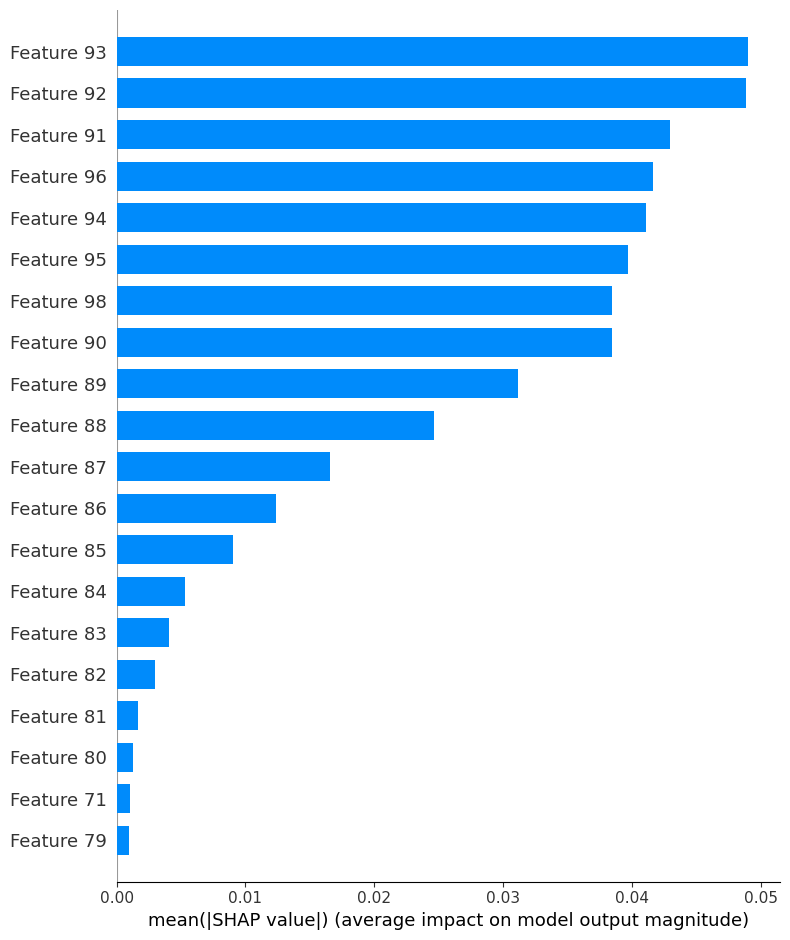

In [63]:
import shap
import numpy as np
import pandas as pd
#from sklearn.linear_model import LinearRegression

# Assuming you have your data in X and y (features and target)

# Create a linear regression model
#model = LinearRegression()
#model.fit(X, y)

# Initialize the SHAP explainer with your model predictions
explainer = shap.Explainer(model.predict, X)

# Calculate Shapley values for all features
shap_values = explainer(X)

# Summary plot to visualize feature importances
shap.summary_plot(shap_values, X, plot_type="bar")

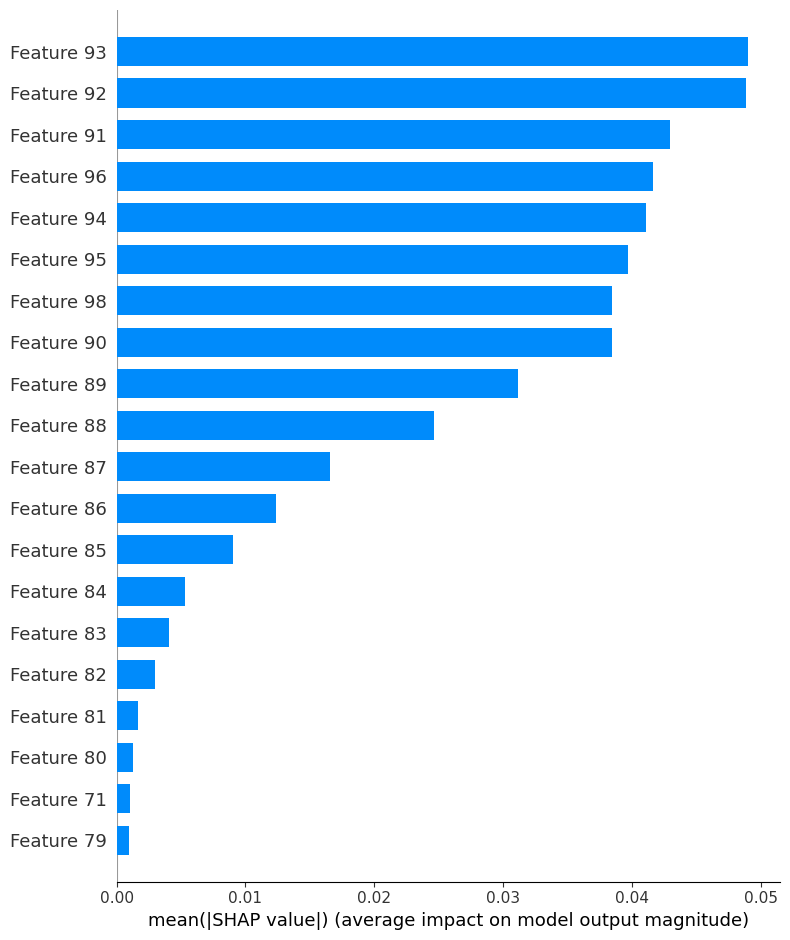

In [1]:
shap.summary_plot(shap_values, X, plot_type="bar")

## visualizing the FIA results

the following code was taken from Jeng, Yu, Frassinelli (2023)

In [2]:
label_dict = {
    0: "descriptive", 
    1: "enigmatic"}

In [3]:
def get_topk_features_by_class(shap_values, label, top_k):    
    cohorts = {"": shap_values[:,:,label]}
    cohort_exps = list(cohorts.values())
    #cohort_exps[0] = cohort_exps[0].abs.mean(0)
    cohort_exps[0] = cohort_exps[0].mean(0)
       
    features = cohort_exps[0].data
    feature_names = cohort_exps[0].feature_names
    
    values = np.array([cohort_exps[i].values for i in range(len(cohort_exps))])
    
    feature_order = np.argsort(np.mean([np.argsort(convert_ordering(Explanation.argsort.flip, Explanation(values[i]))) for i in range(values.shape[0])], 0))
    feature_inds = feature_order[:top_k]
    
    top_k_features = {}
    for i in feature_inds:
        #top_k_features.append(feature_names[i])
        top_k_features[feature_names[i]] = values[0][i]

    return top_k_features

In [16]:
def get_topk_features(shap_values, top_k):
    # Collapse shap_values across all instances and classes
    shap_values_all_classes = np.abs(shap_values.values).mean(0)

    # Get the top K features
    top_k_indices = np.argsort(shap_values_all_classes)[-top_k:]
    top_k_values = shap_values_all_classes[top_k_indices]

    # Create a dictionary with feature names as keys and SHAP values as values
    feature_names = shap_values.feature_names
    top_k_features = {feature_names[i]: top_k_values[j] for j, i in enumerate(top_k_indices)}

    return top_k_features

In [24]:
from collections import defaultdict

def get_corpus_feature_count(shap_values, label):
    # Create a list of all documents for the specified label
    docs = shap_values

    # Initialize a dictionary to count feature occurrences in the entire corpus
    corpus_feature_count = defaultdict(int)

    # Iterate through documents and count feature occurrences
    for doc in docs:
        for i in doc:
            corpus_feature_count[str(i).strip()] += 1

    return corpus_feature_count

In [31]:
from collections import defaultdict

def get_feature_count_by_label(doc_df, shap_values, label):
    # Create a list of all documents for the specified label
    docs = [doc for i, doc in enumerate(shap_values) if doc_df['Annotation'].iloc[i] == label]

    # Initialize a dictionary to count feature occurrences for the label
    feature_count_per_label = defaultdict(int)

    # Iterate through documents and count feature occurrences
    for doc in docs:
        for i in doc:
            feature_count_per_label[str(i).strip()] += 1

    return feature_count_per_label

In [ ]:
#i dont think i have to specify those variables bc i didn't externally save
#the explainer and the model but they did

#shap_path = model_shap_dict[MODEL_NAME]
#shap_values = pickle.load(open(shap_path, 'rb'))

In [34]:
from collections import defaultdict

doc_df = df_LM

for i in range(len(label_dict)):
    print("Processing class {}".format(i))
    #top_k_features = get_topk_features_by_class(shap_values=shap_values, label=i, top_k=50)
    top_k_features = get_topk_features(shap_values, top_k=50)
    feature_count_corpus = get_corpus_feature_count(shap_values=shap_values, label=i)
    feature_count_per_label = get_feature_count_by_label(doc_df=doc_df, shap_values=shap_values, label=i)
    
    freq_by_label = []
    freq_corpus = []

    for feature in top_k_features.keys():
        freq_by_label.append(feature_count_per_label[feature])
        freq_corpus.append(feature_count_corpus[feature])
    
    #label_corpus_freq_ratio = [i / j for i, j in zip(freq_by_label, freq_corpus)]
    label_corpus_freq_ratio = [i / j if j != 0 else 0 for i, j in zip(freq_by_label, freq_corpus)]
    
    df_result = pd.DataFrame({"feature": top_k_features.keys(),
                              "shap": top_k_features.values(),
                              "freq_by_label": freq_by_label,
                              "freq_corpus": freq_corpus,
                              "label_corpus_freq_ratio": label_corpus_freq_ratio,
                             })
    
    
    df_result.to_csv("/kaggle/working/resultsSHAP.tsv", sep="\t", encoding="utf-8", index=False)
    
print("Done.")

Processing class 0
Processing class 1
Done.


In [7]:
shap_values.shape

(1448, 100)

# Using PDP (Partial Dependence Plots) for Model Interpretability (instead of SHAP cause that didn't work)

In [43]:
! pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 87.0 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Load and prepare your dataset
X = data
y = df_LM['Annotation'].values

# Train your model (if not already done)
model = RandomForestClassifier()
model.fit(X, y)

# Create PDP for the target feature ('TargetNoun' in this example)
#target_feature = 'Compound'

# Plot the PDP
PartialDependenceDisplay.from_estimator(model, X, y, kind='individual')
#PartialDependenceDisplay.from_estimator(model, X, features=[target_feature], kind='individual')
#plot_partial_dependence(model, X, features=[target_feature])
plt.show()

KeyboardInterrupt: 

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # You can choose the model you trained
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/opt/conda/lib/python3.10/site-packages/sklearn/inspection/__init__.py)

In [ ]:
# Assuming you've loaded your dataset into a DataFrame df
X = df[['TargetNoun', 'OtherFeature1', 'OtherFeature2', ...]]  # Include all relevant features
y = df['Annotation']  # Your target variable

In [ ]:
model = RandomForestClassifier()  # You can use the model you trained earlier
model.fit(X, y)

In [ ]:
target_feature = 'TargetNoun'  # Replace with the actual feature name you want to analyze
fig, ax = plt.subplots()
plot_partial_dependence(model, X, features=[target_feature], grid_resolution=50, ax=ax)
plt.suptitle(f'Partial Dependence Plot for {target_feature}')
plt.show()